<a href="https://colab.research.google.com/github/nasarar/Post_Covid19_Vacation_Projection/blob/main/pcvplanner_ver4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Post Covid_19 Vacation Planner



## Your gateway to safe travel 

In [1]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

In [2]:
import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import pandas as pd

# Data Collection : Source - https://covid.ourworldindata.org/

In [3]:
import pandas as pd

#load dataset
pcv= pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
print('Shape of data',pcv.shape)
pcv.head()
pcv

Shape of data (93945, 59)


iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.511
1          AFG      Asia  ...           64.83                   0.511
2          AFG      Asia  ...           64.83                   0.511
3          AFG      Asia  ...           64.83                   0.511
4          AFG      Asia  ...           64.83                   0.511
...        ...       ...  ...             ...                     ...
93940      ZWE    Africa  ...           61.49                   0.571
93941      ZWE    Africa  ...           61.49                   0.571
93942      ZWE    Africa  ...           61.49                   0.571
93943      ZWE    Africa  ...           61.49                   0.571
93944      ZWE    Africa  ...           61.49                   0.571

[93945 rows x 59 columns]

In [4]:
pd.options.display.max_seq_items = 230

# ARIMA Model process & Dependencies 

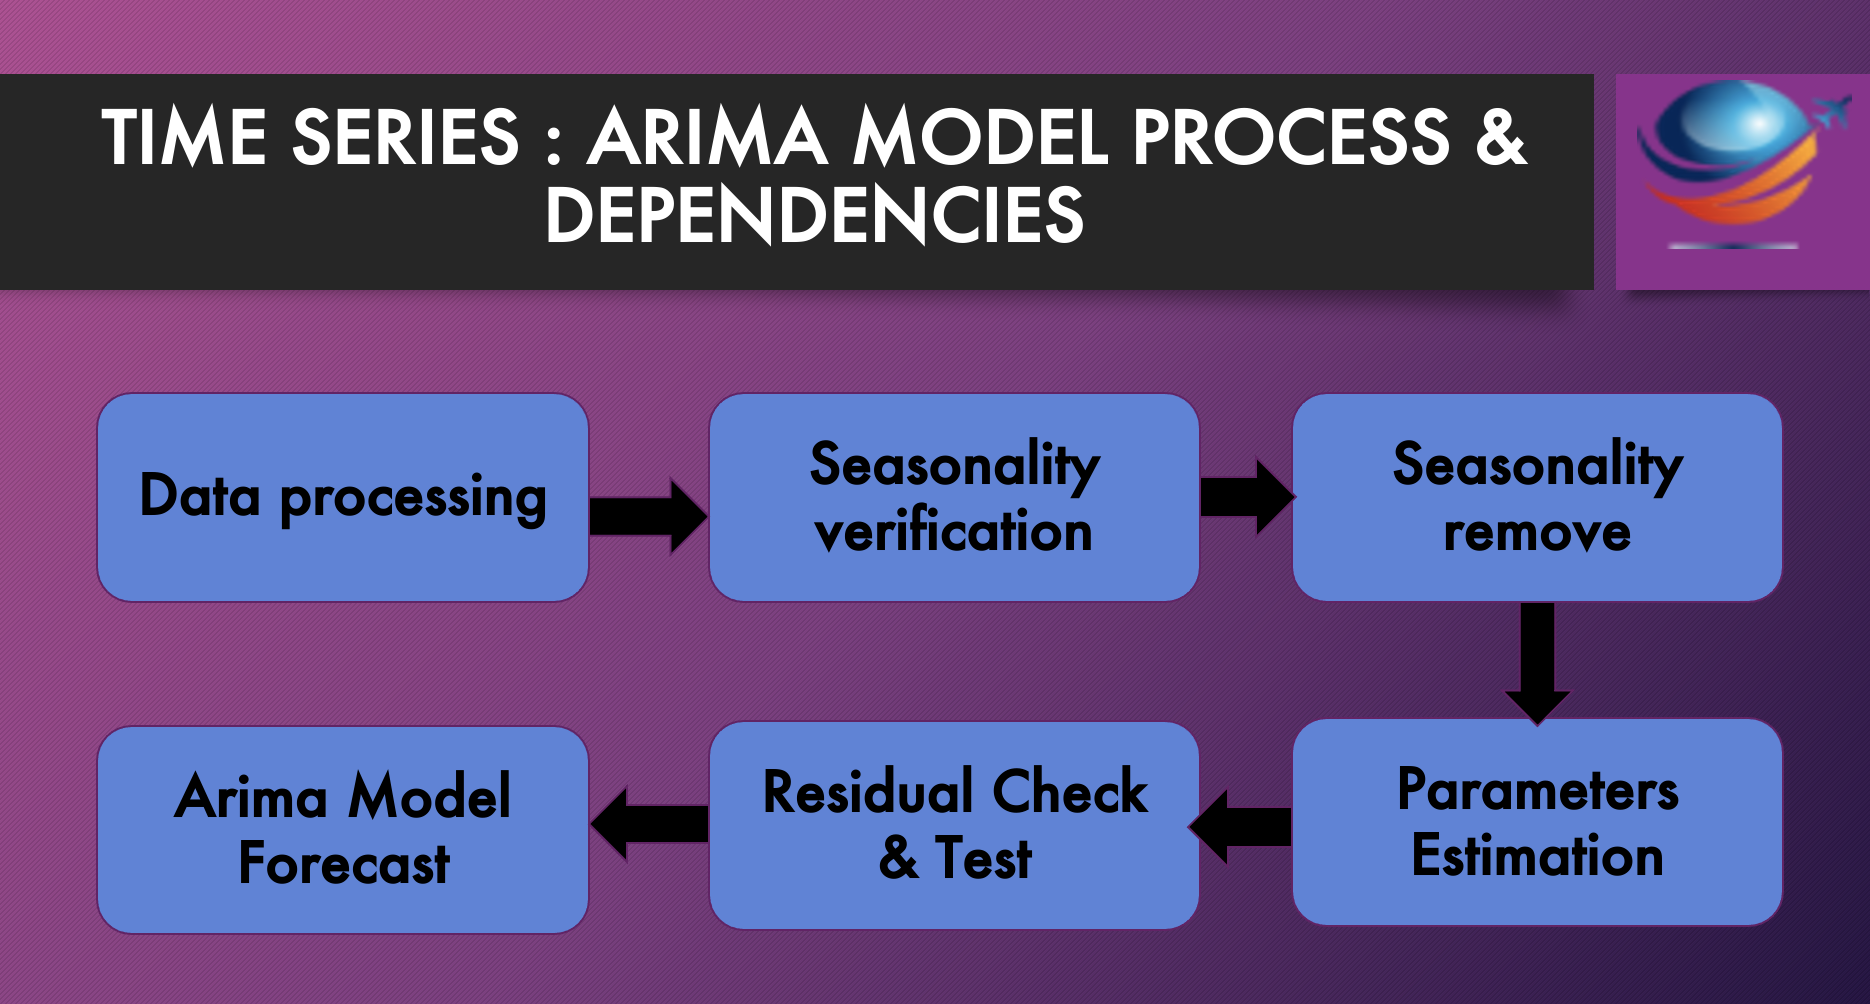

In [5]:
!pip install pmdarima 

     |████████████████████████████████| 1.5MB 10.7MB/s 
     |████████████████████████████████| 9.5MB 54.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


## Import Dependencies 

In [6]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# Best Model chosen is : ARIMA (p,d,q) = ARIMA(4,4,2) & Plots

## Two order differencing for making Timeseries stationary

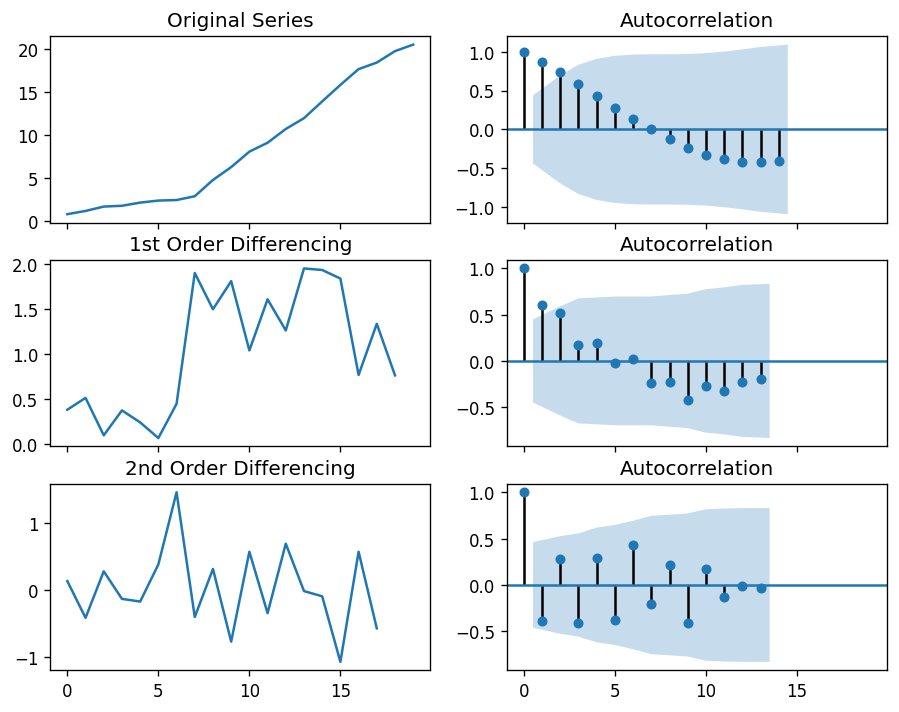

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=32.618, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=35.820, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=34.849, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=35.357, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=33.844, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=34.597, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=34.580, Time=0.17 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=37.335, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=36.353, Time=0.03 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=30.661, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=33.510, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=32.947, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=32.635, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=32.617, Time=0.09 sec


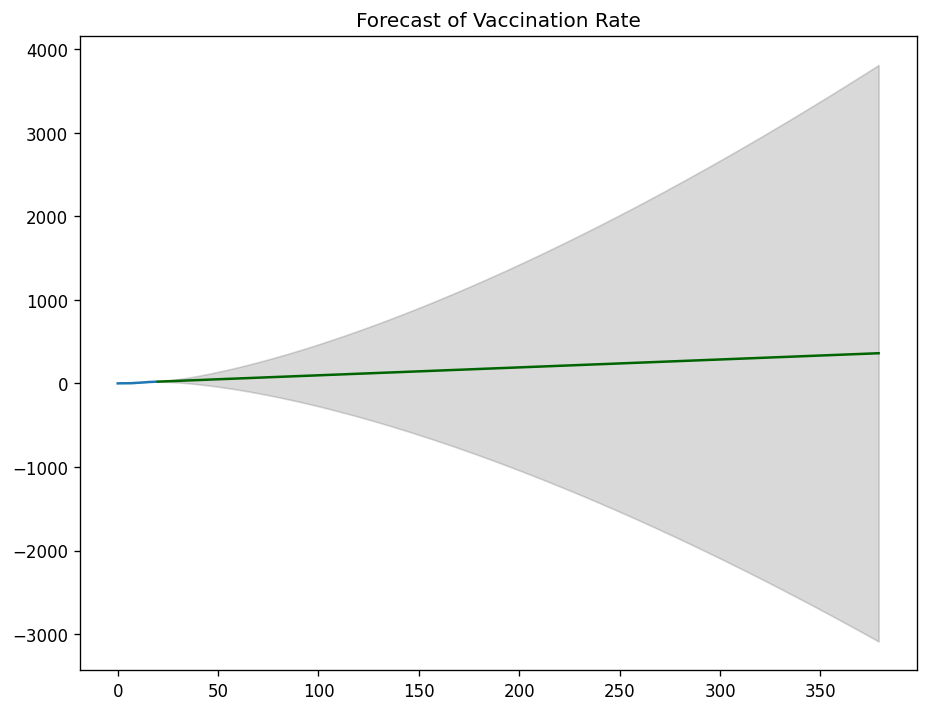

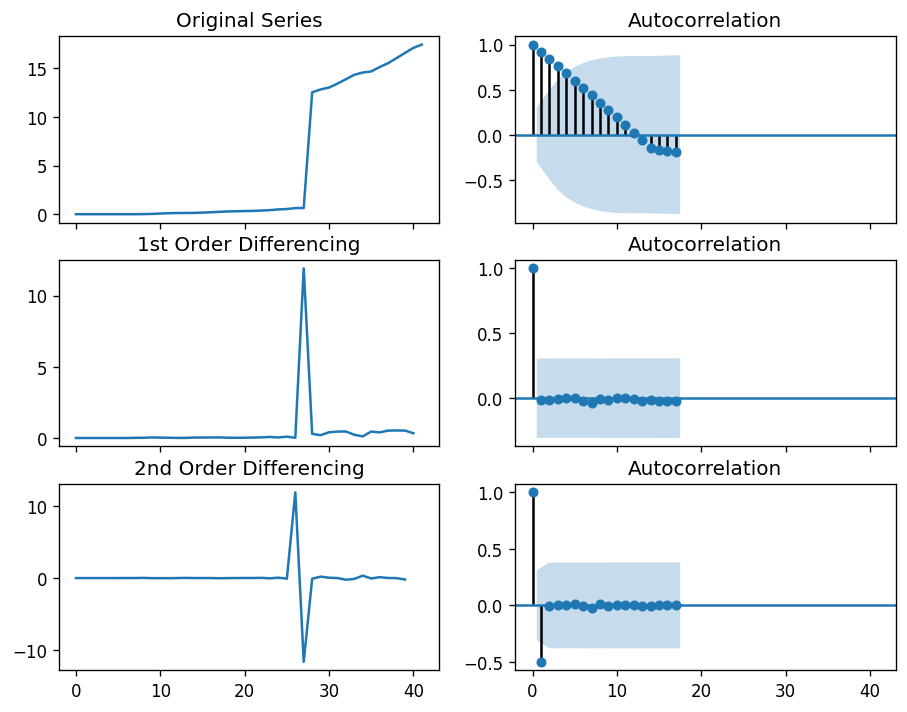

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=194.817, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=185.631, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=192.818, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=182.924, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=182.331, Time=0.03 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=182.780, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=180.339, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=180.928, Time=0.02 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=180.792, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=176.211, Time=0.07 sec
 A

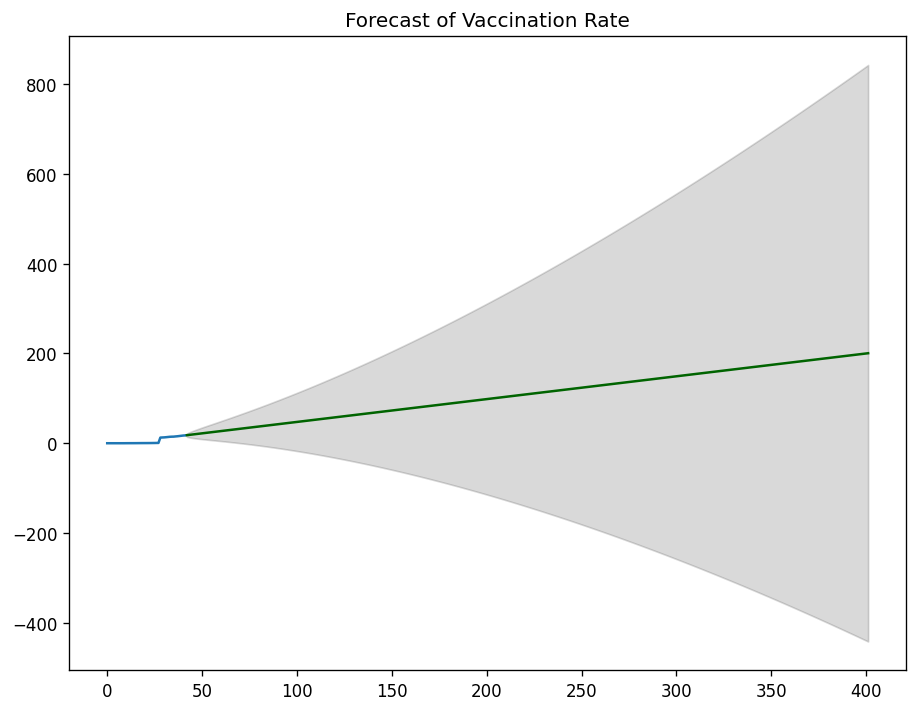

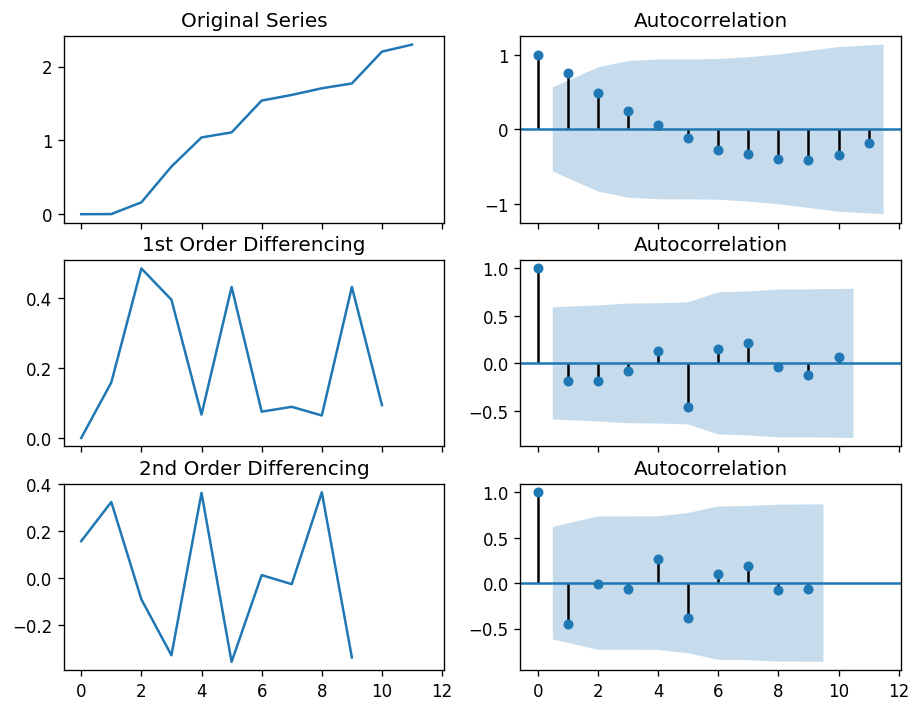

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=6.485, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5.939, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=4.497, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.298 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  -1.248
Date:                Tue, 08 Jun 2021   AIC                              4.497
Time:                        04:40:42   BIC                              4.799
Sample:                             0   HQIC                             4.165
                                 - 12                                         
Covariance Type:

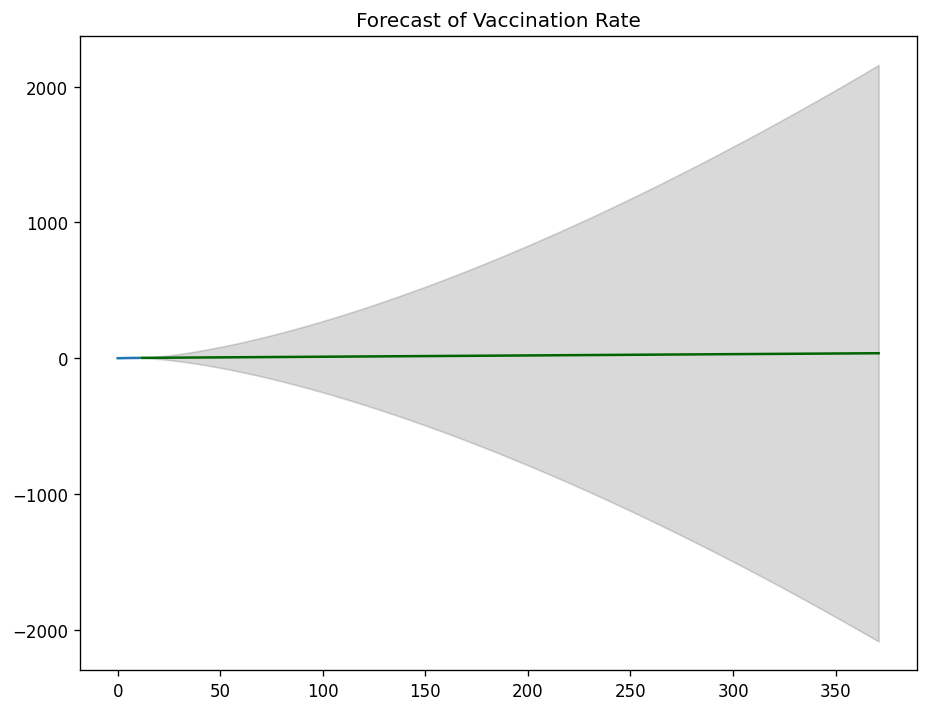

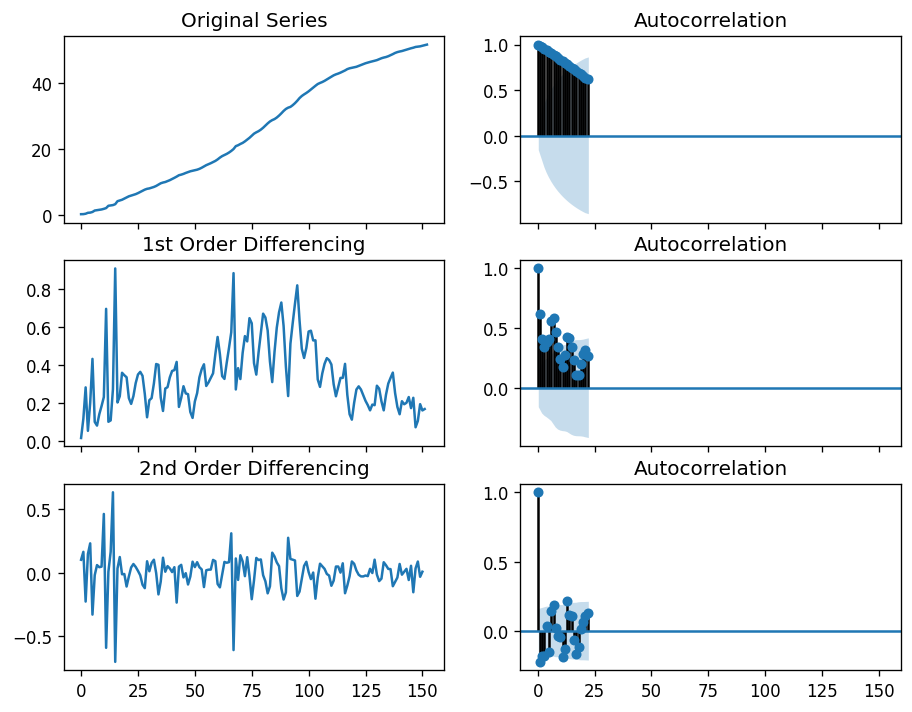

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-185.420, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-146.655, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-152.184, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-176.547, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-148.648, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-185.975, Time=0.18 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-187.900, Time=0.12 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-186.142, Time=0.22 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-187.459, Time=0.35 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-189.900, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-178.546, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-187.975, Time=0.12 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-188.142, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : 

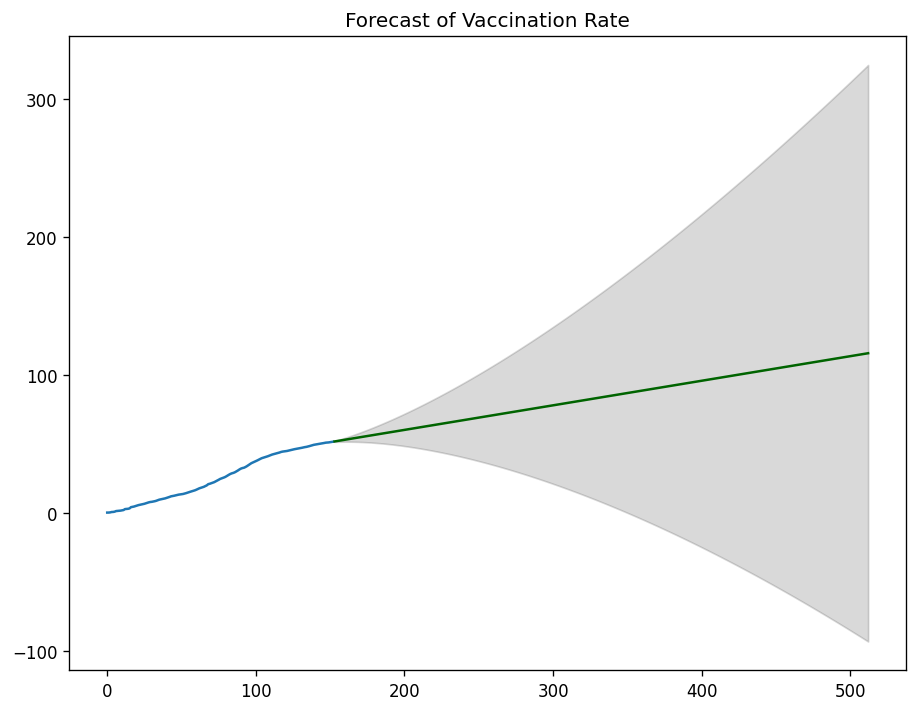

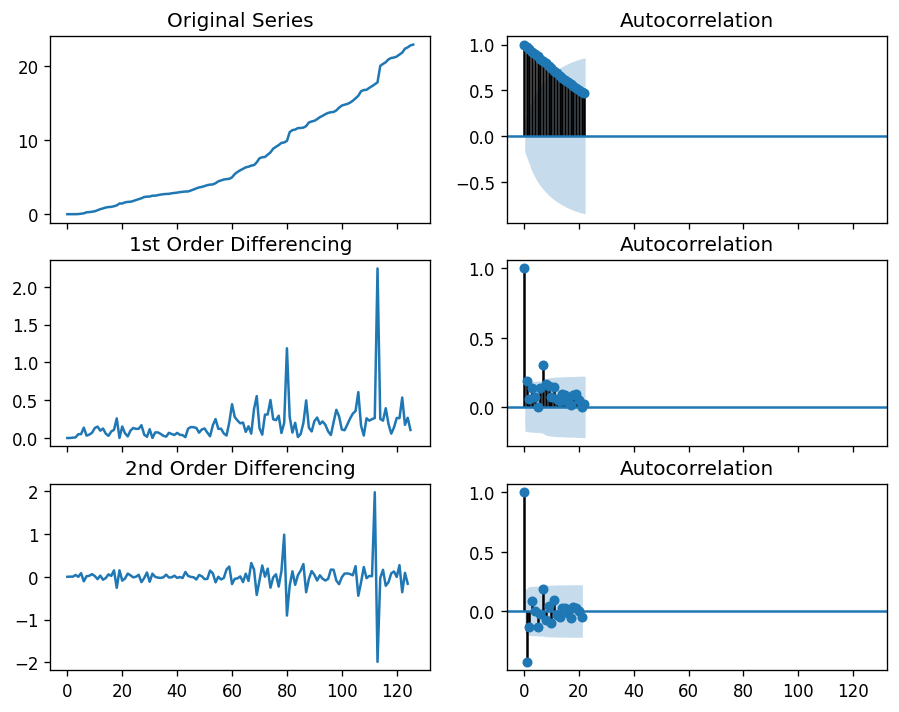

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3.795, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2.811, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=0.328, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=0.517, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=57.844, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2.180, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2.113, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2.479, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2.238, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-3.802, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=36.757, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=26.394, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-2.205, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-2.298, Time=0.13 sec
 ARIM

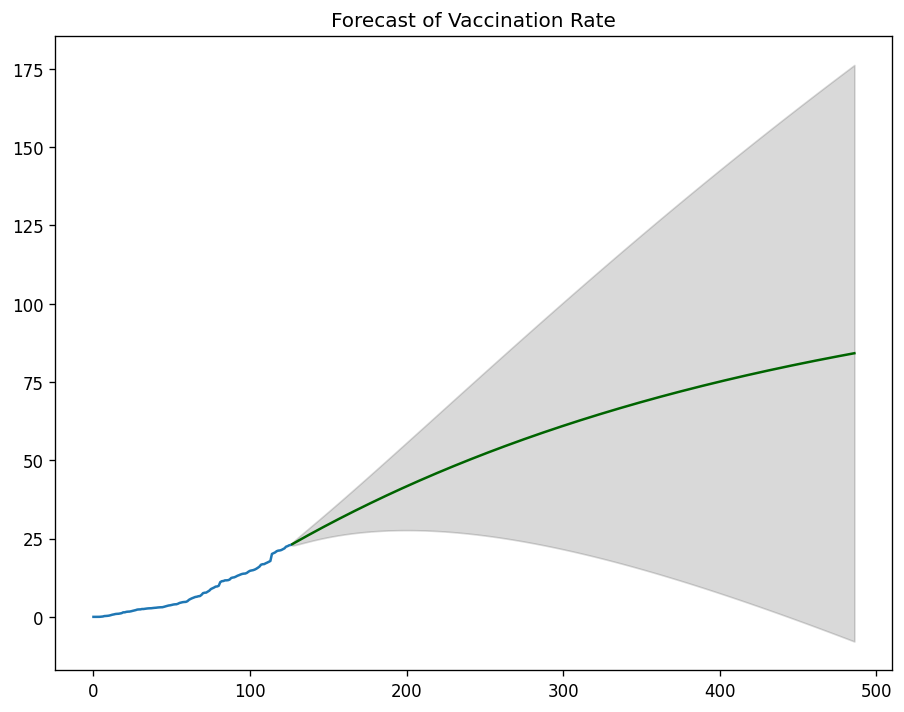

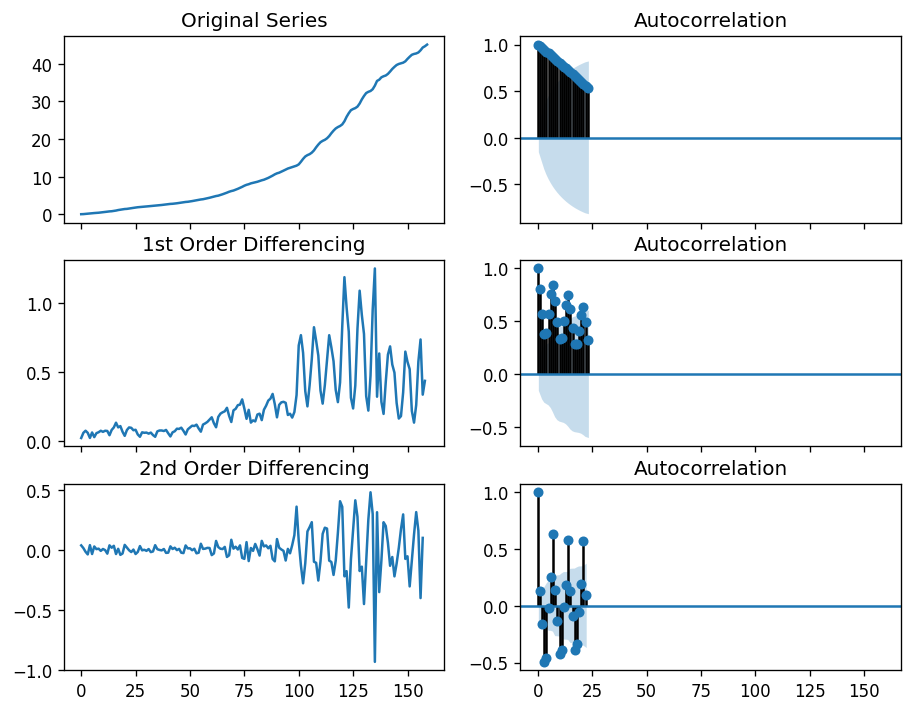

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-123.931, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-124.519, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-125.161, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-125.864, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-126.477, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.476 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  160
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  64.239
Date:                Tue, 08 Jun 2021   AIC                           -126.477
Time:                        04:40:51   BIC                           -123.415
Sample:                             0   HQIC                          -125.233
                                - 160                                       

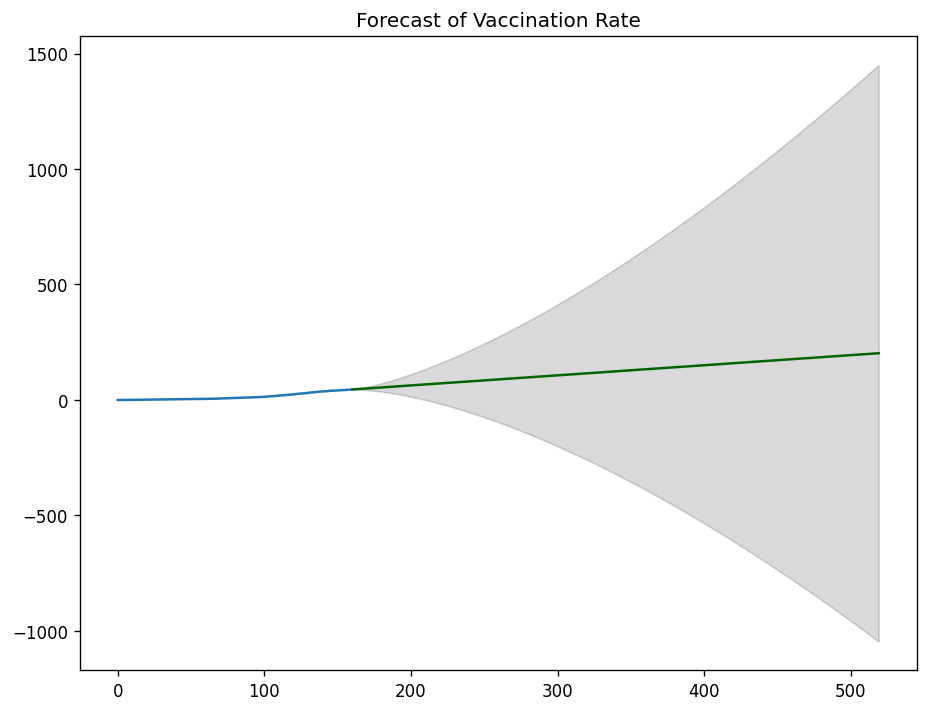

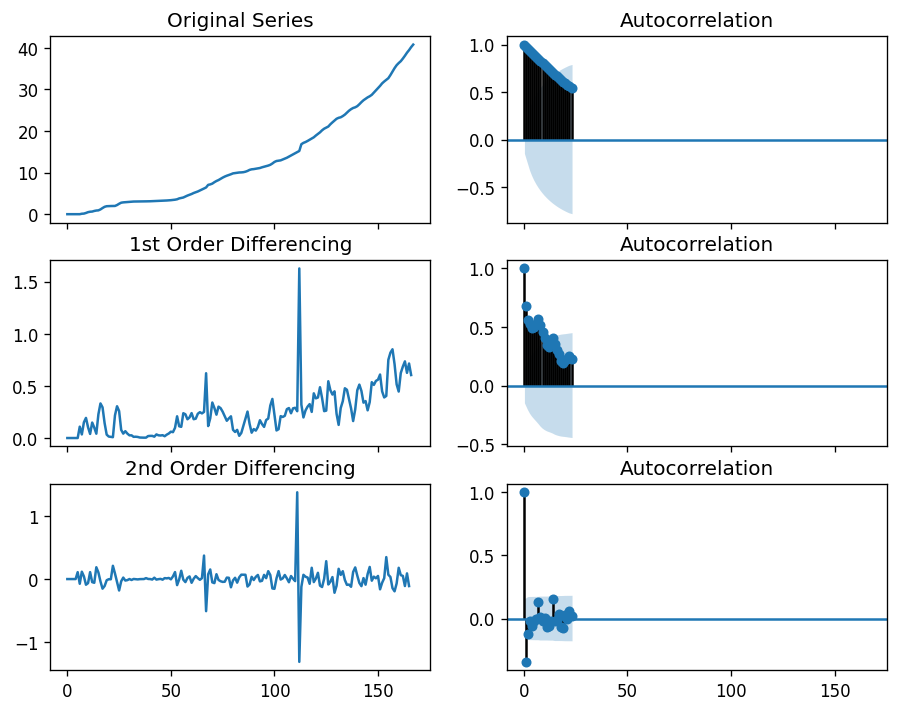

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-156.782, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-100.017, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-118.722, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-152.934, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-101.947, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-155.602, Time=0.18 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-155.305, Time=0.29 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-157.303, Time=0.16 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-151.434, Time=0.19 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-155.693, Time=0.39 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-156.336, Time=0.06 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0] intercept
Total fit time: 1.712 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  

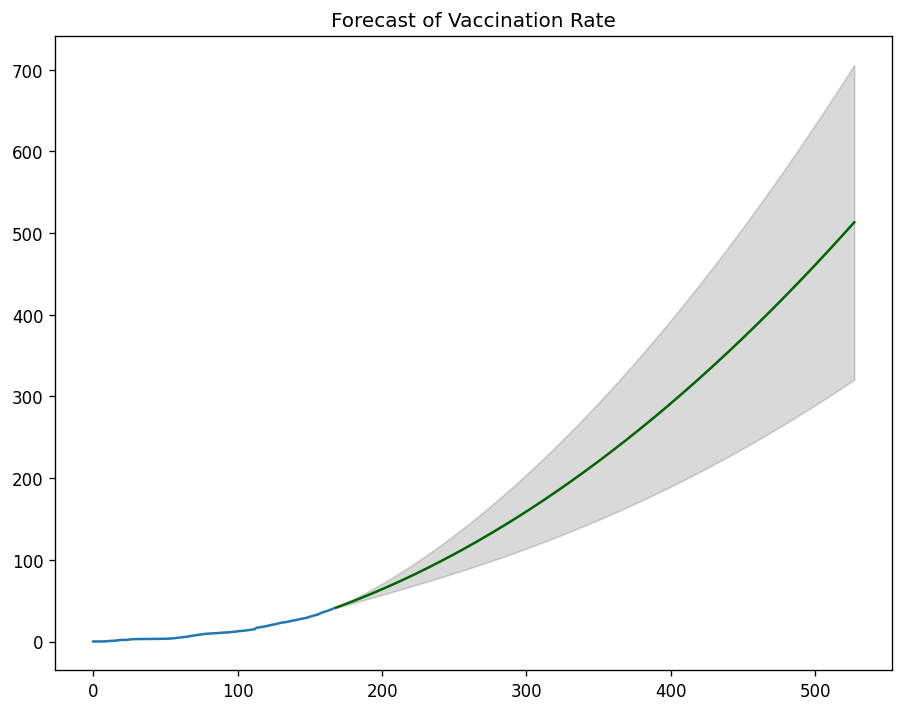

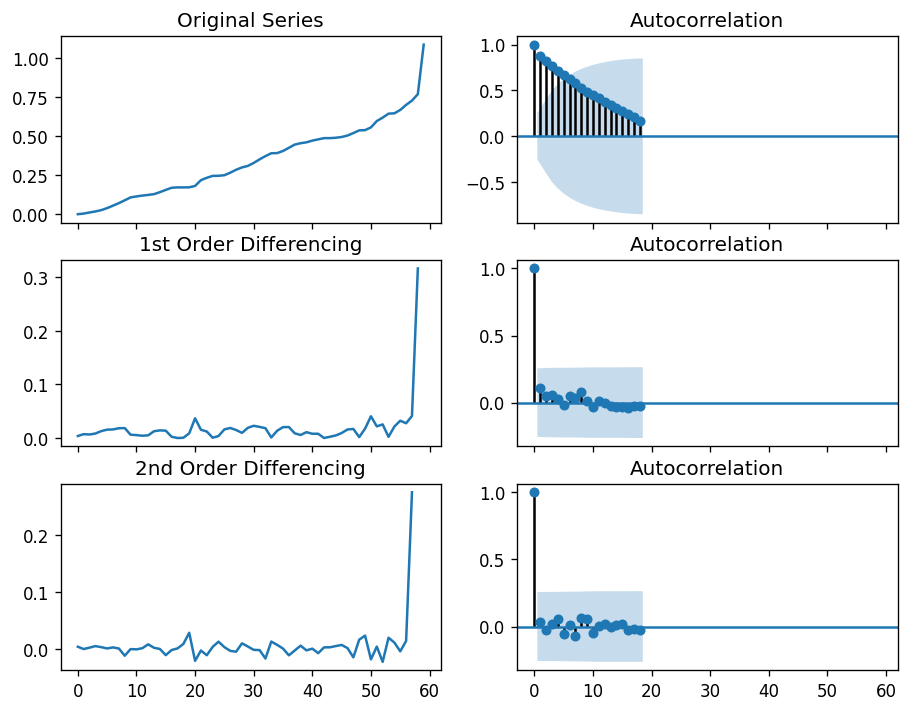

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-210.476, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-213.555, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-212.198, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-212.462, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-214.341, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.345 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 108.171
Date:                Tue, 08 Jun 2021   AIC                           -214.341
Time:                        04:40:55   BIC                           -212.281
Sample:                             0   HQIC                          -213.539
                                 - 60                                       

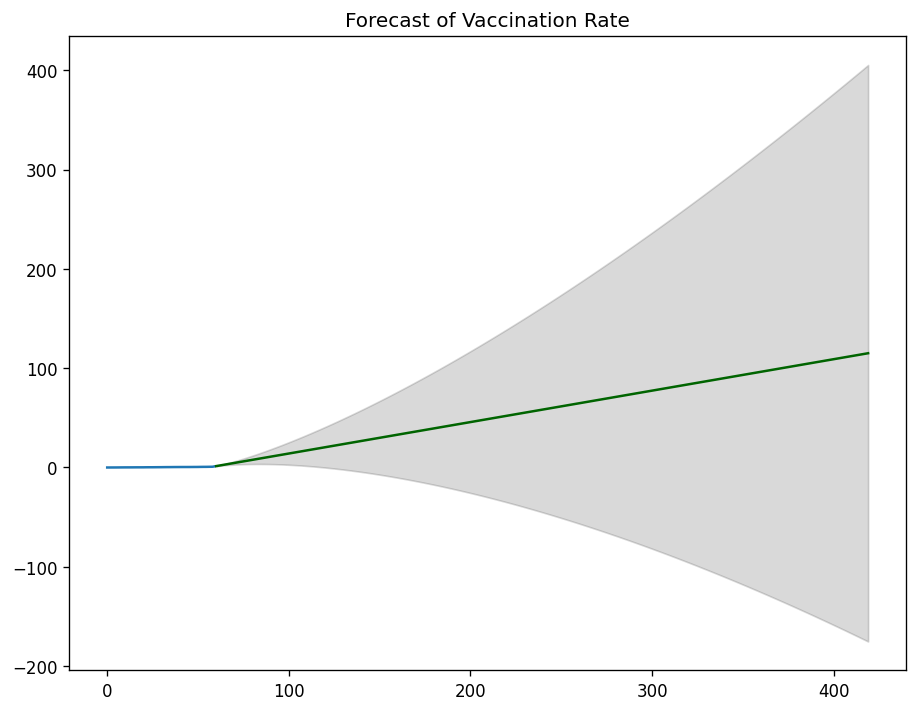

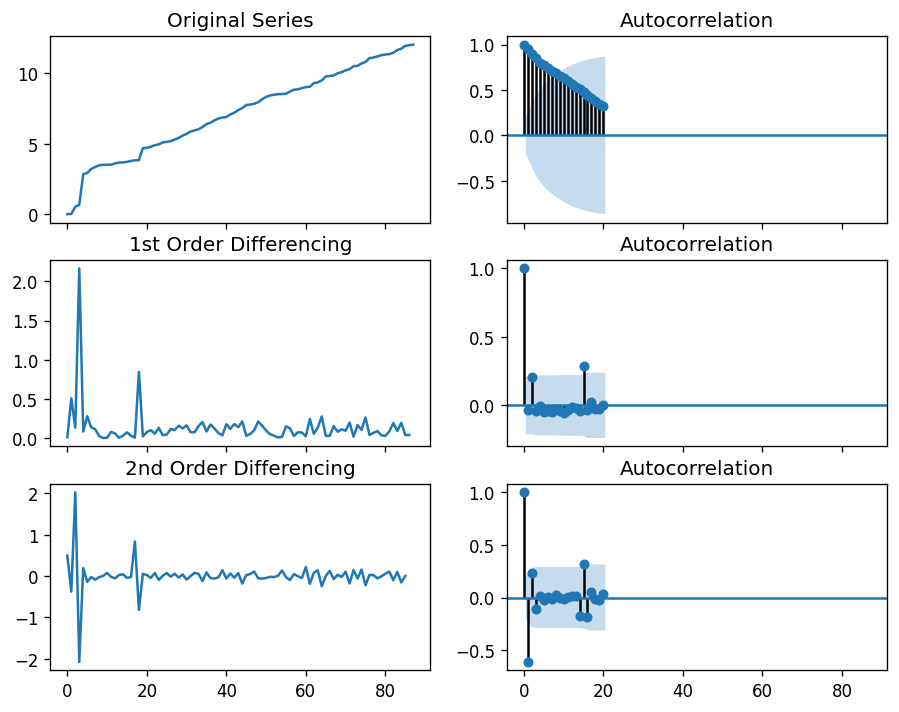

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8.932, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6.666, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8.554, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8.586, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28.537, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.321 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   88
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  -1.333
Date:                Tue, 08 Jun 2021   AIC                              6.666
Time:                        04:40:57   BIC                             11.598
Sample:                             0   HQIC                             8.652
                                 - 88                                         
Covariance 

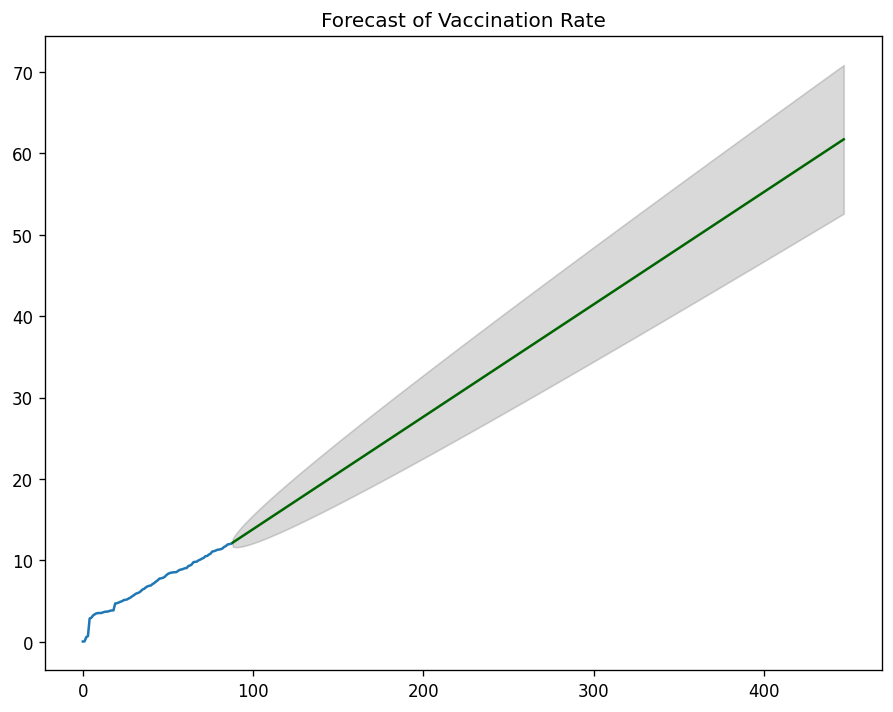

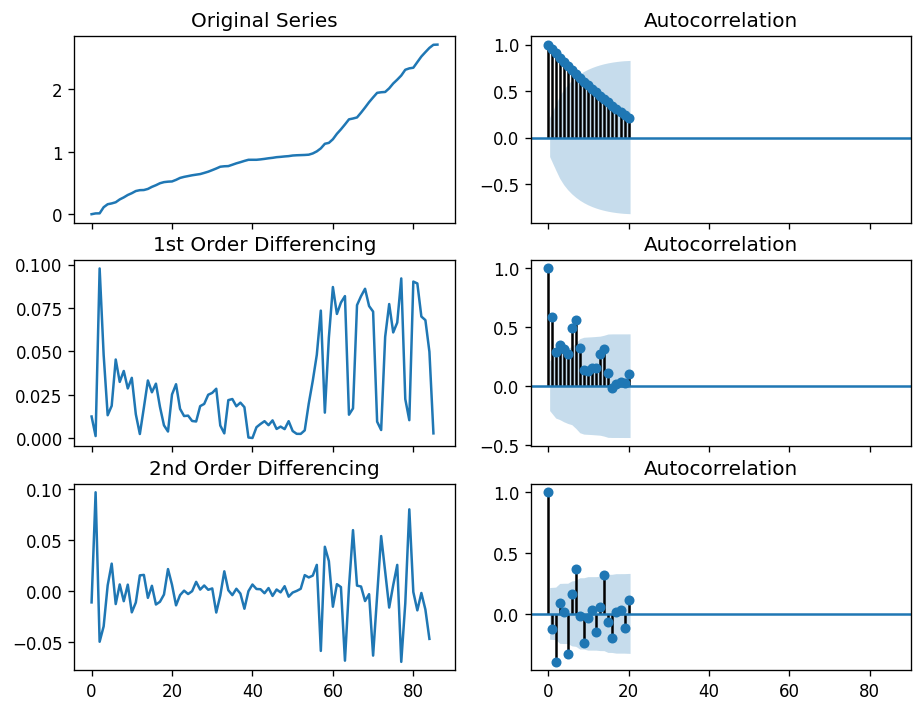

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-392.925, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-376.604, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-375.996, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-387.007, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-378.602, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-399.608, Time=0.26 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-394.664, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-398.481, Time=0.31 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-399.643, Time=0.31 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-399.485, Time=0.42 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-397.401, Time=0.35 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-397.370, Time=0.19 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-398.779, Time=0.23 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-398.726, Time=0.42 sec
 ARIMA(2,2,2)(0,0,0)[0]          

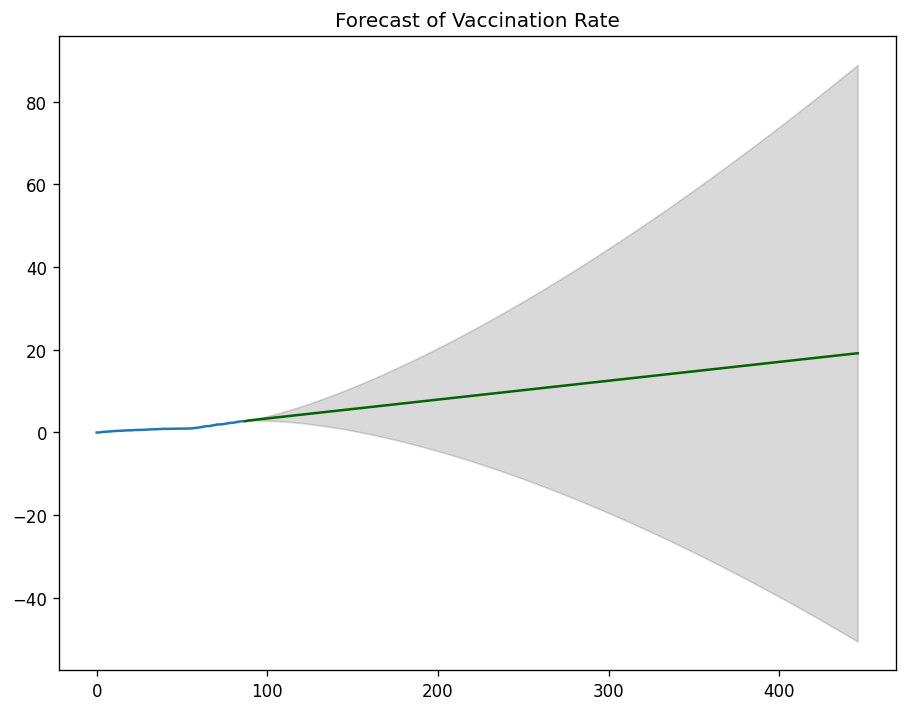

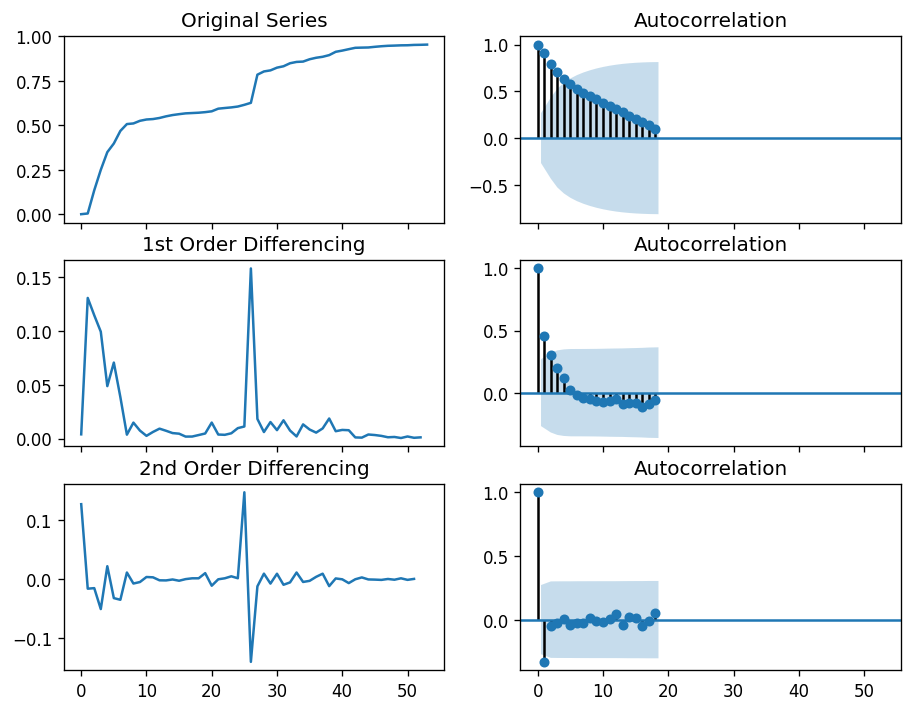

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-214.400, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-205.323, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-215.584, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-212.544, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-193.970, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-214.341, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-212.426, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-213.351, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.830 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   54
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 110.792
Date:                Tue, 08 Jun 2021   AIC                           -215.584
Time:                        04:41:0

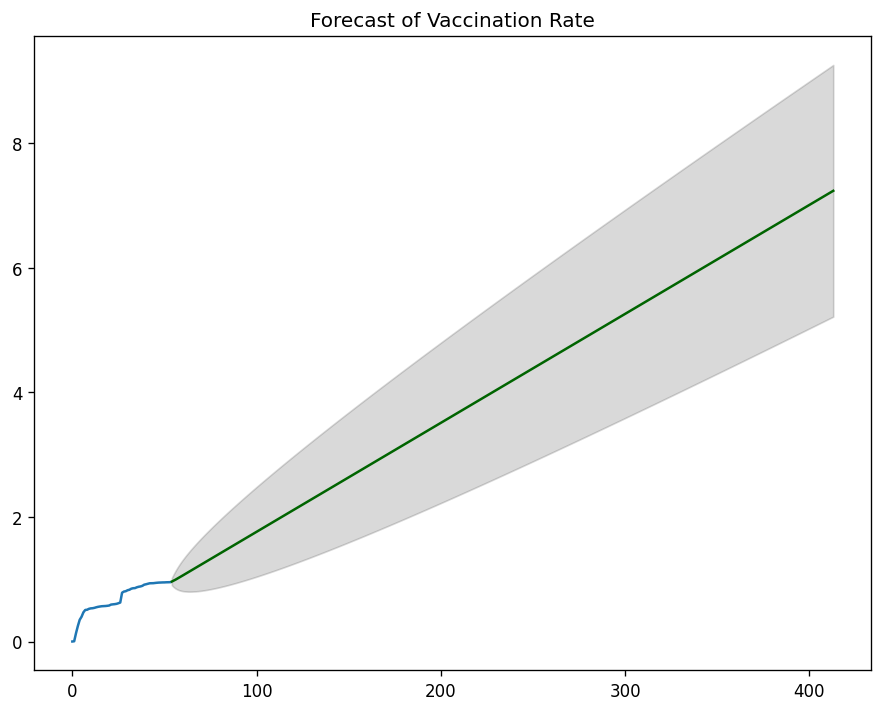

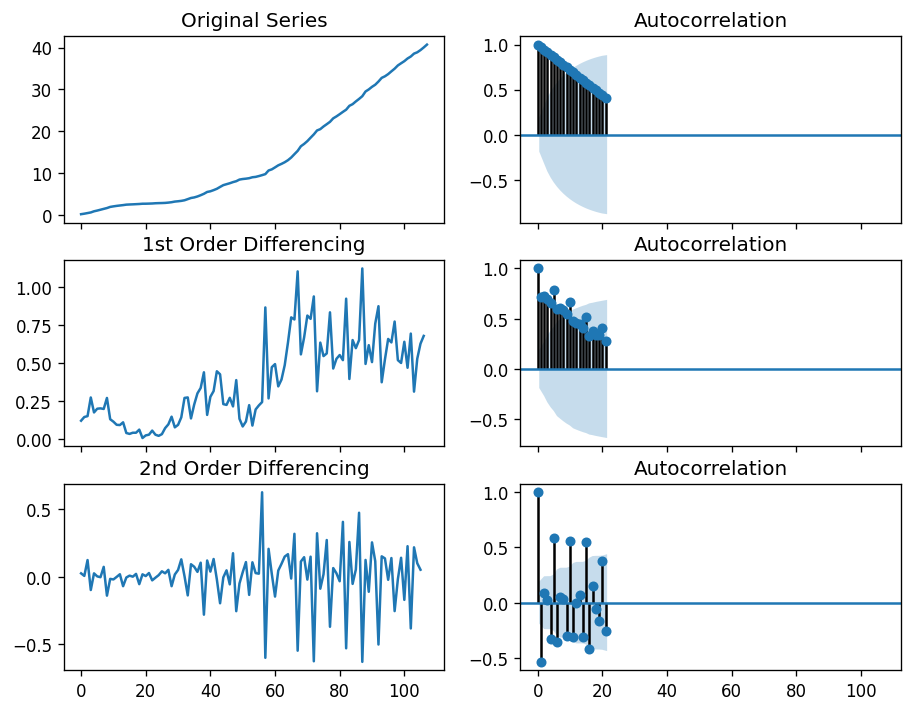

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-80.117, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-32.388, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-66.022, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-81.074, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-34.317, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-80.141, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-82.221, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-81.368, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-81.413, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-67.808, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.146 seconds
                               SARIMAX Results                                
Dep. Variable:               

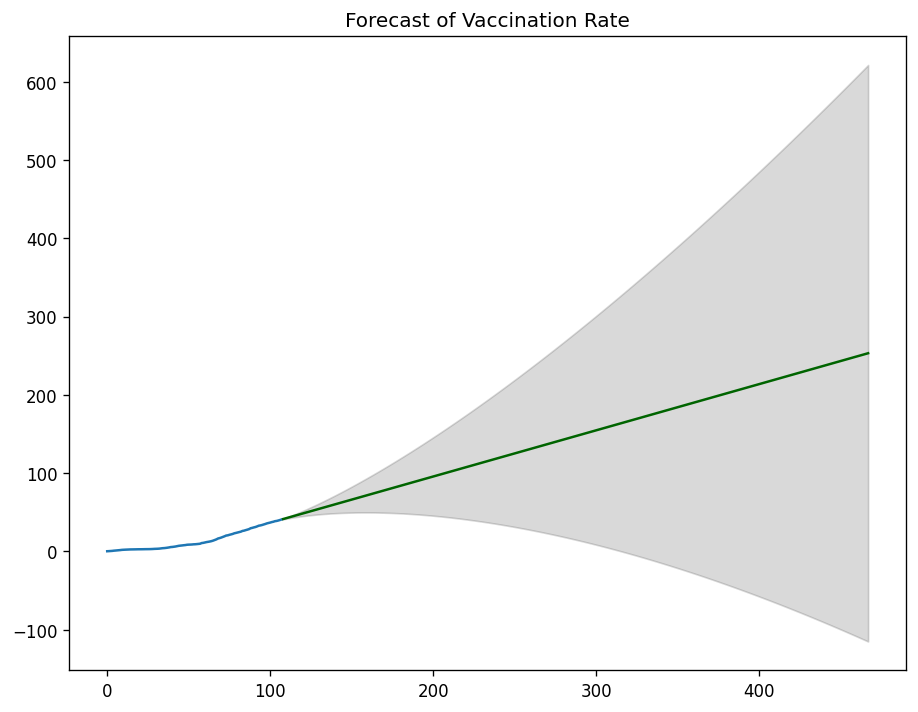

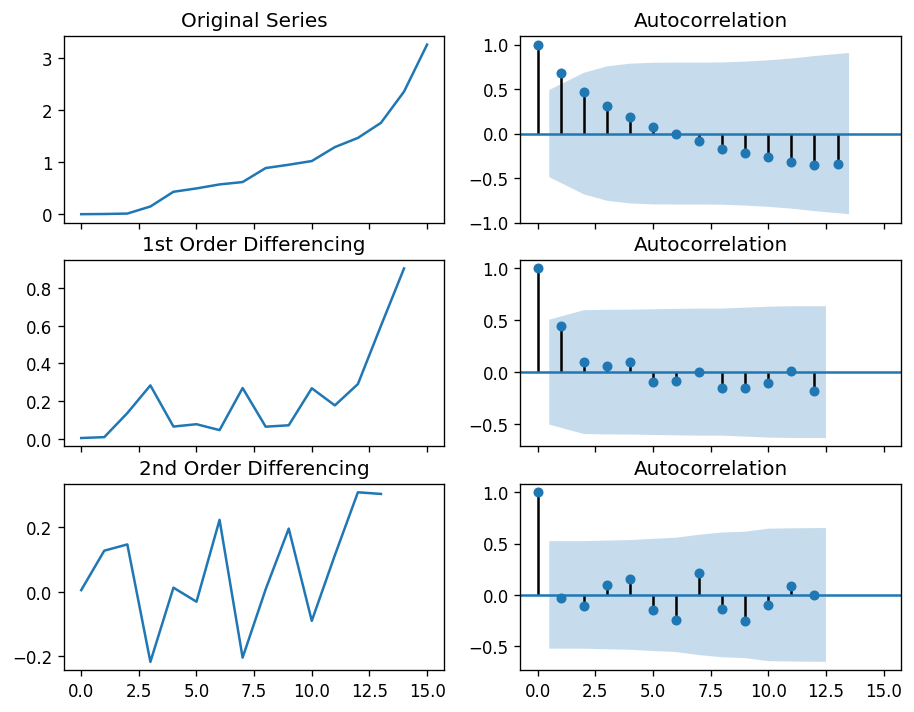

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-3.819, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-7.164, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-5.175, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-5.179, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-7.124, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.346 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 2, 0)   Log Likelihood                   5.582
Date:                Tue, 08 Jun 2021   AIC                             -7.164
Time:                        04:41:10   BIC                             -5.886
Sample:                             0   HQIC                            -7.283
                                 - 16                                         
Covaria

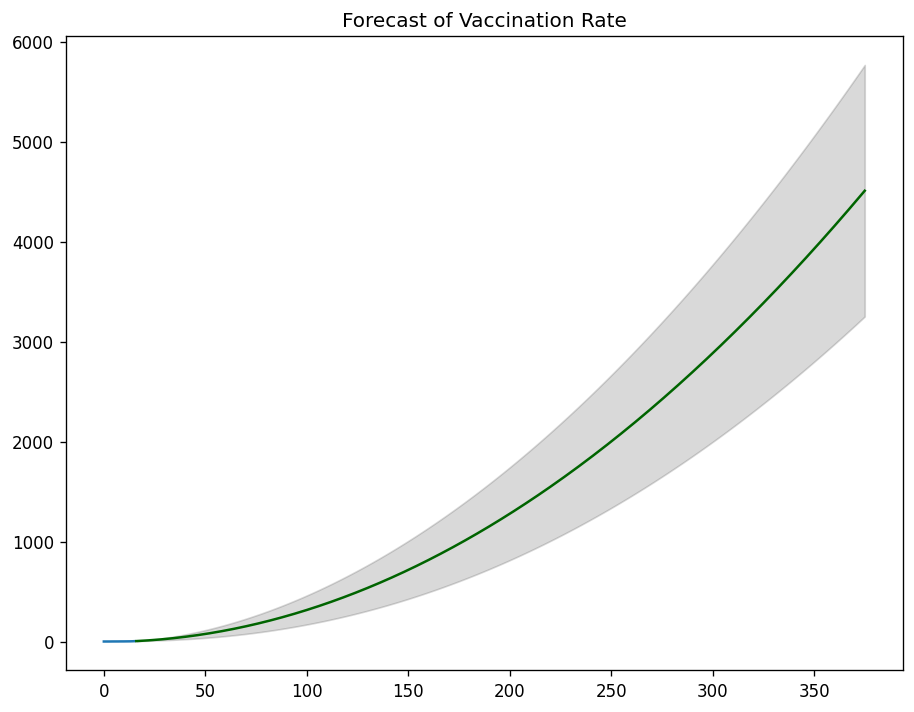

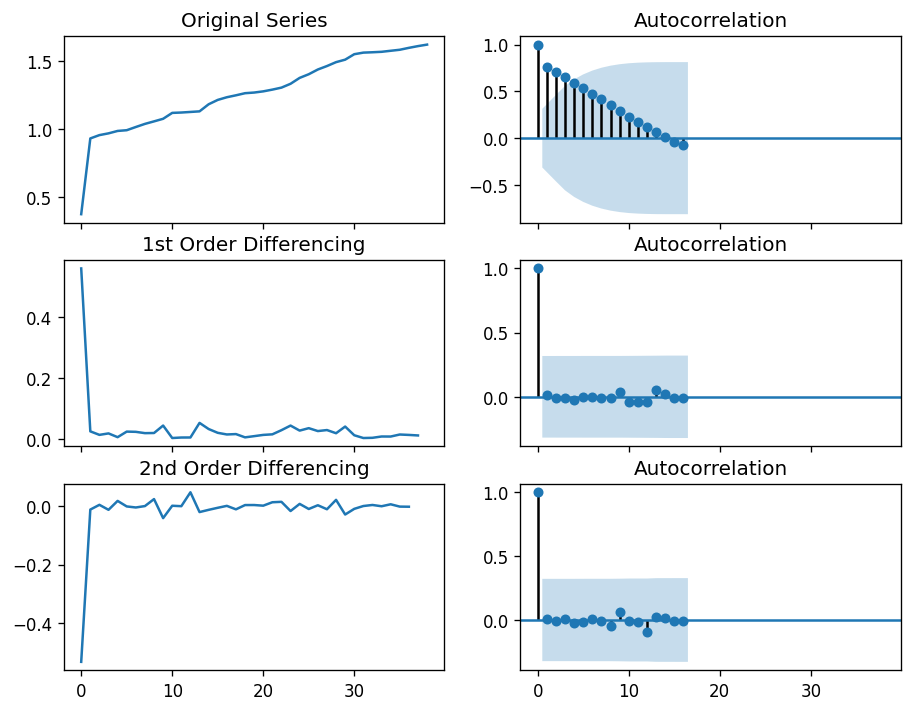

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-67.103, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-71.060, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-69.121, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-69.155, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-72.025, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.635 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   39
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  37.012
Date:                Tue, 08 Jun 2021   AIC                            -72.025
Time:                        04:41:12   BIC                            -70.414
Sample:                             0   HQIC                           -71.457
                                 - 39                                         
Co

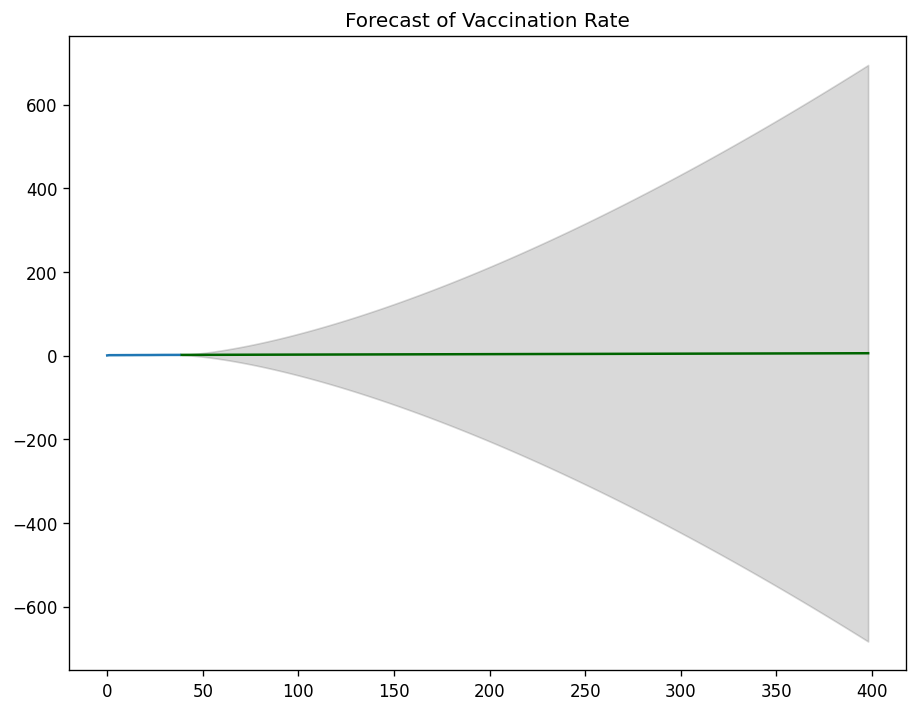

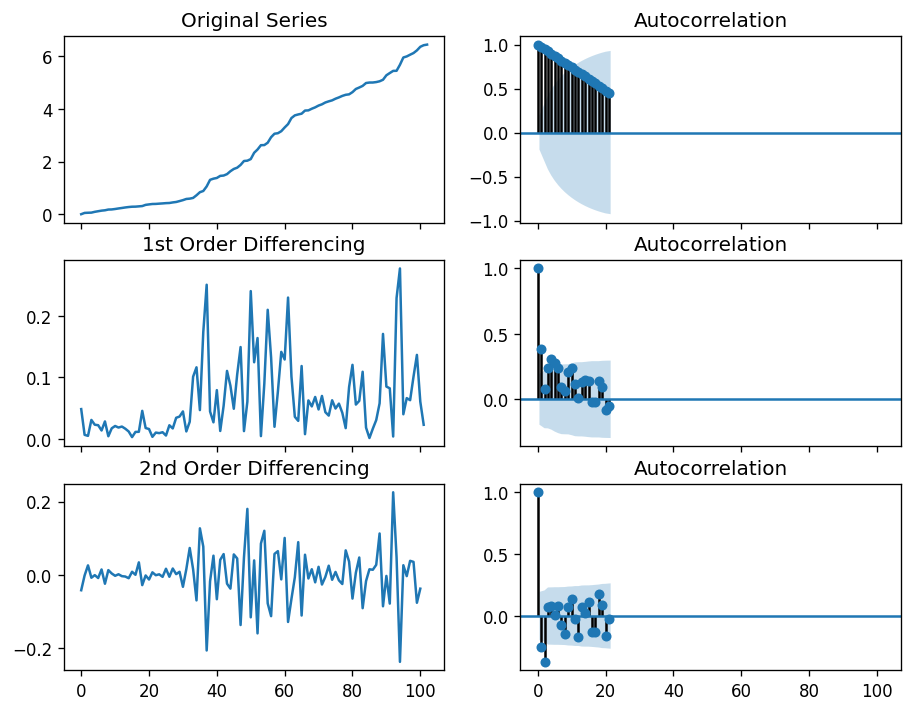

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-287.285, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-251.483, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-256.100, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-285.797, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-253.482, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-292.921, Time=0.23 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-278.998, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-291.283, Time=0.29 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-291.252, Time=0.30 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-288.673, Time=0.12 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-284.009, Time=0.16 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-289.294, Time=0.36 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-294.544, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-288.463, Time=0.15 sec
 ARIMA(2,2,0)(0,0,0)[0]          

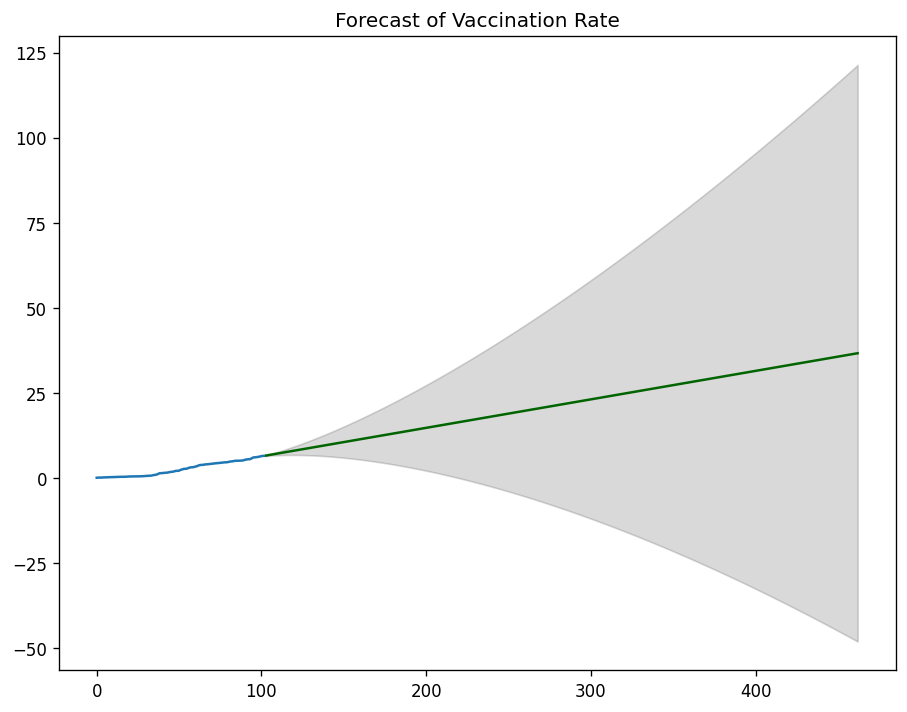

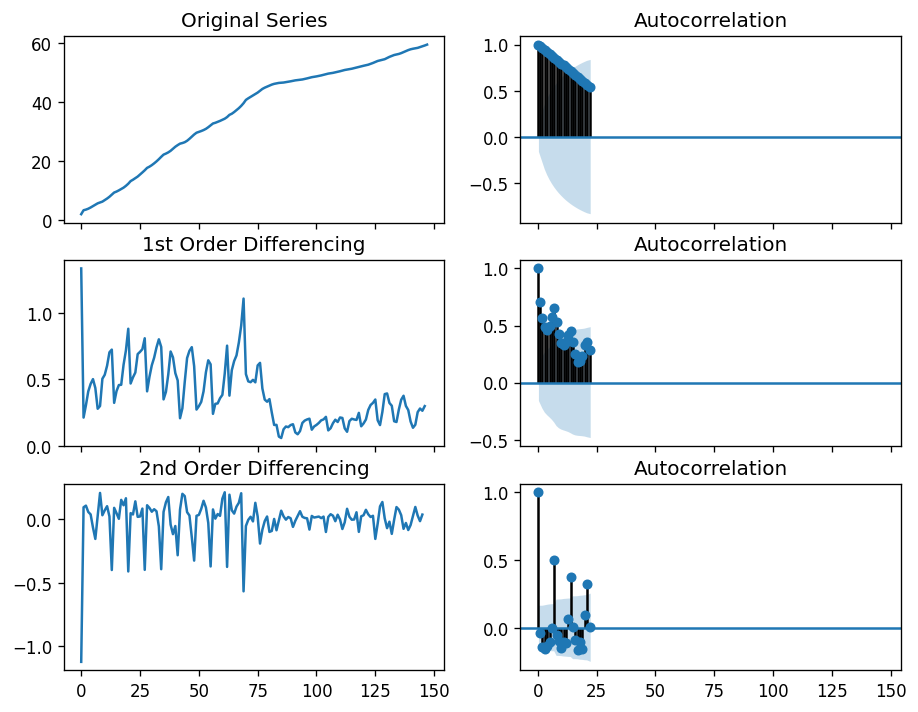

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-122.044, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-120.396, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-120.736, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-123.747, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.736 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  148
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  62.874
Date:                Tue, 08 Jun 2021   AIC                           -123.747
Time:                        04:41:19   BIC                           -120.764
Sample:                             0   HQIC                          -122.535
                                - 148                                         
Co

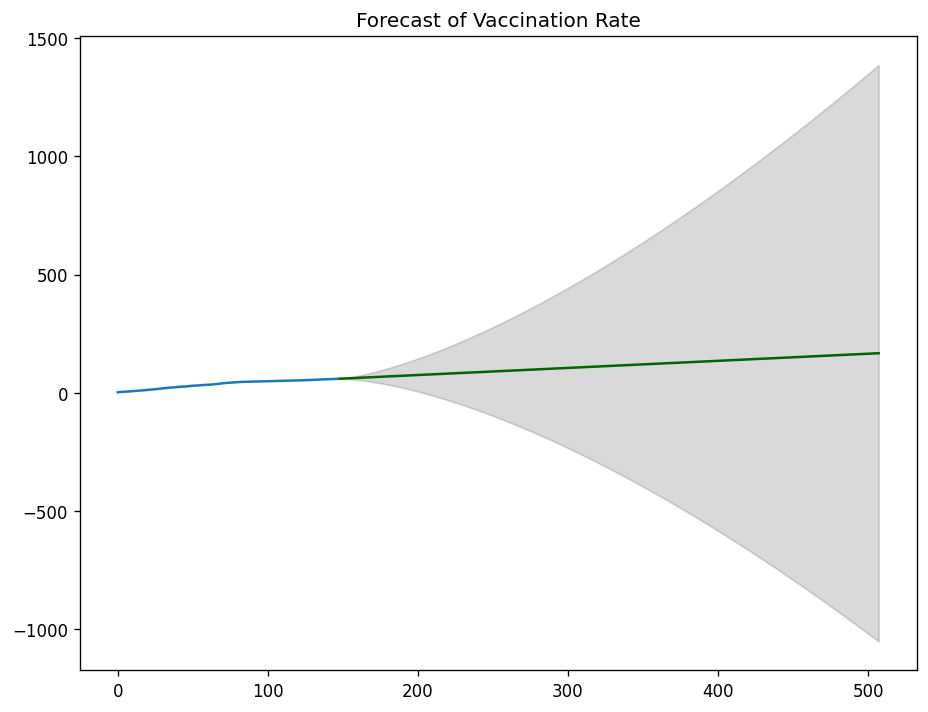

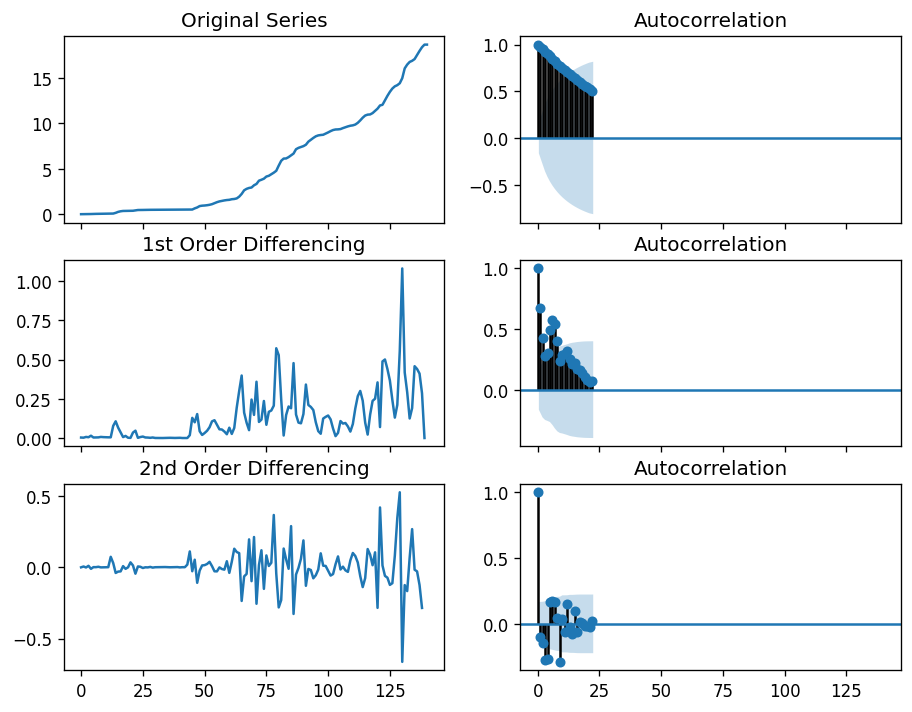

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-167.997, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-167.395, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-168.669, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-169.997, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.617 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  141
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  85.999
Date:                Tue, 08 Jun 2021   AIC                           -169.997
Time:                        04:41:20   BIC                           -167.063
Sample:                             0   HQIC                          -168.805
                                - 141                                         
Co

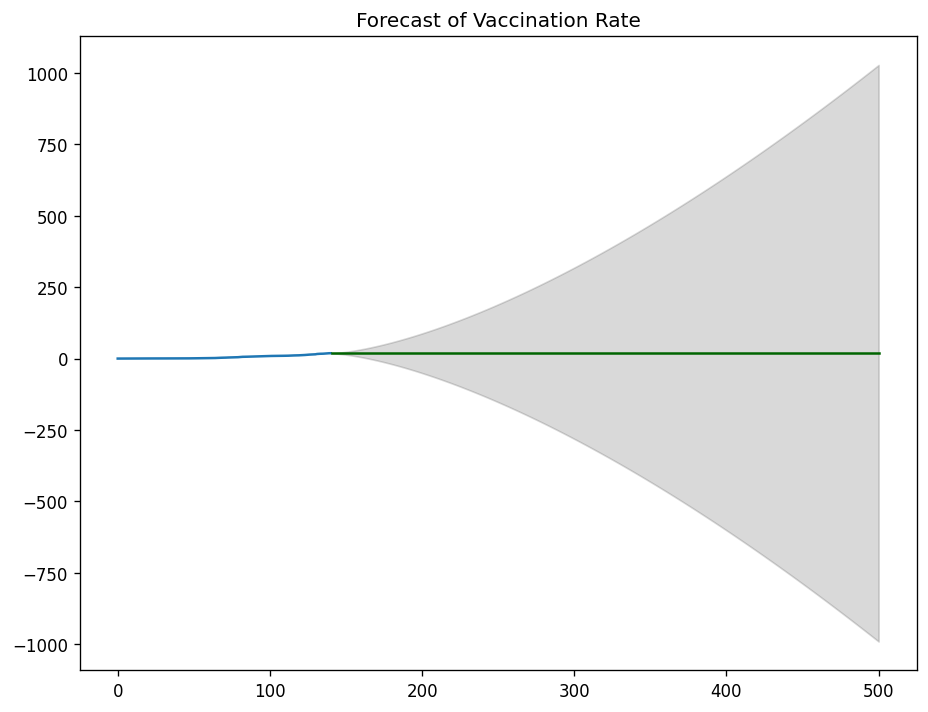

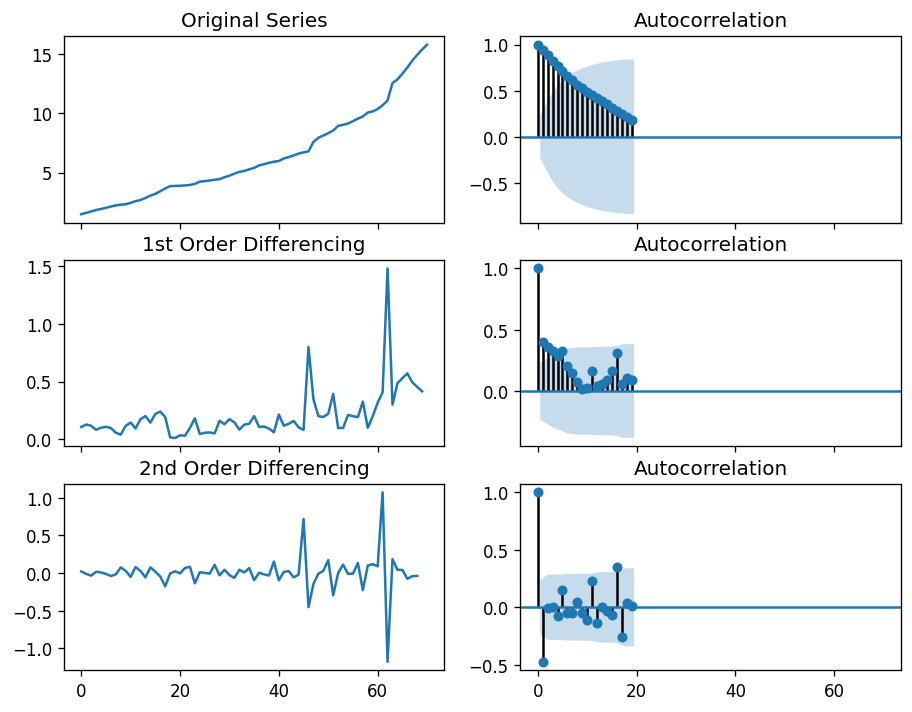

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-31.255, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-1.532, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-16.911, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-32.951, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-3.506, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-31.226, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-29.140, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-32.956, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-31.024, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-31.022, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-18.837, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-29.013, Time=0.09 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.799 seconds
                               SARIMAX Results                                
Dep. Variable:         

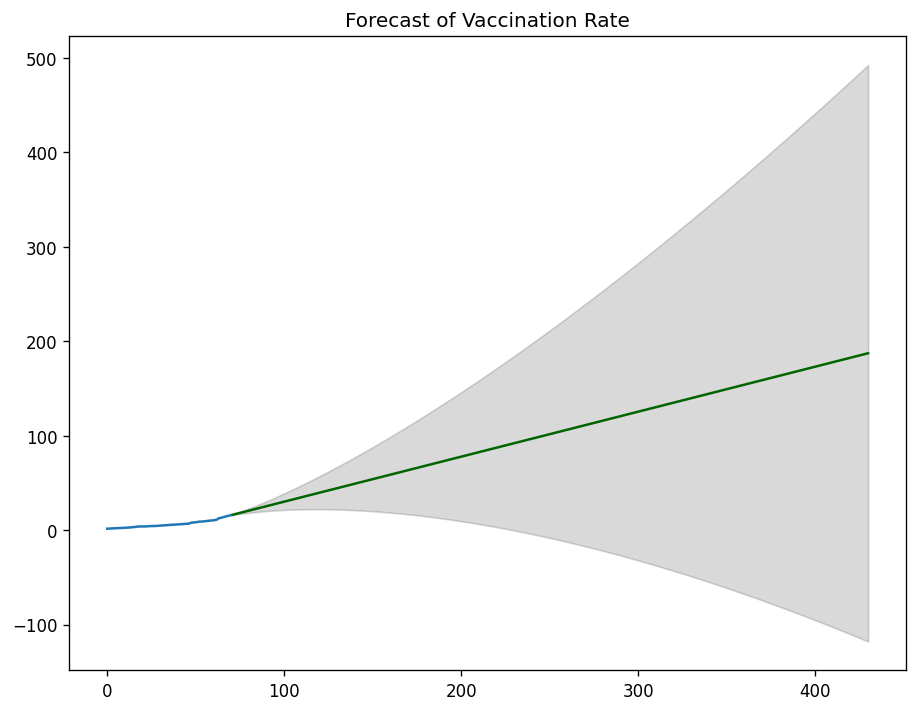

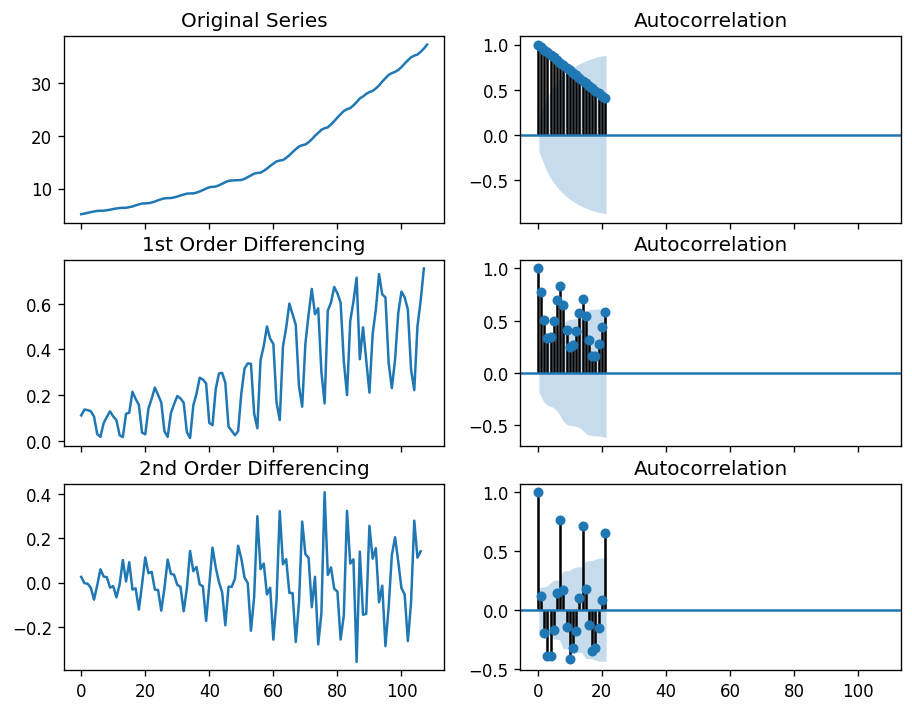

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-132.874, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-24.878, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-128.324, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-103.773, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=91.067, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-131.322, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-140.371, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-127.915, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-130.534, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-146.315, Time=0.34 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-144.202, Time=0.38 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-147.514, Time=0.37 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-141.011, Time=0.26 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC

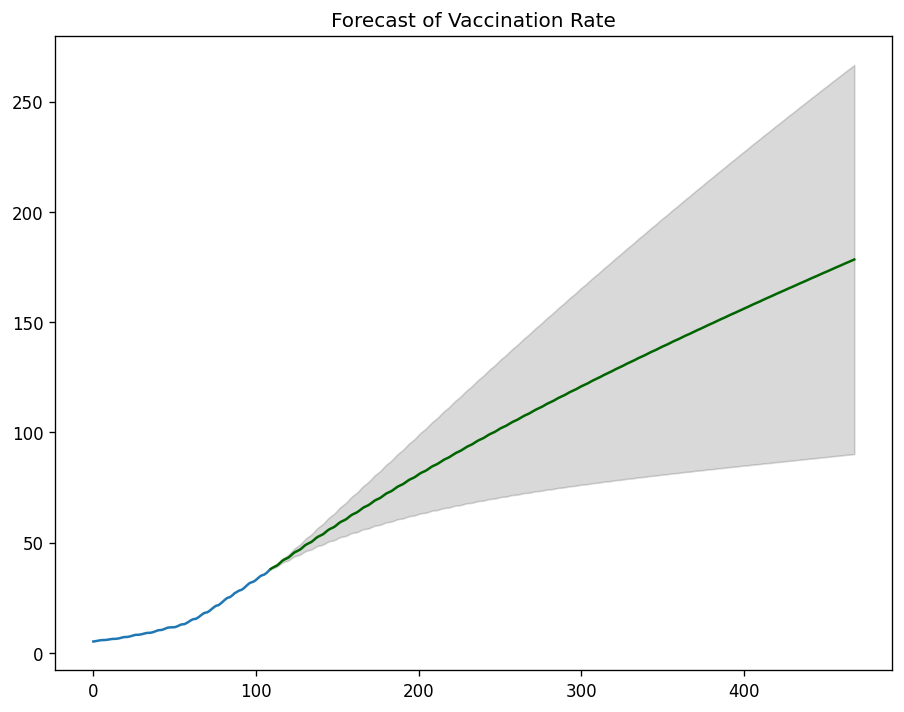

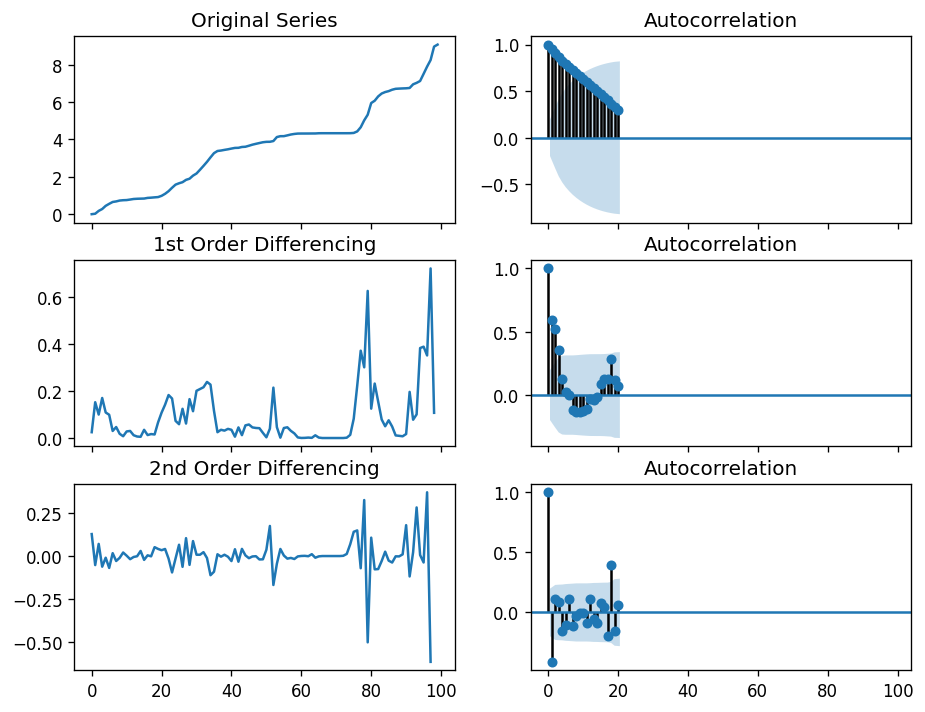

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-171.959, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-127.335, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-168.031, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-151.179, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-86.521, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-175.609, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-177.484, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-175.849, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-178.509, Time=0.29 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-183.623, Time=0.39 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-185.070, Time=0.15 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=-178.828, Time=0.09 sec

Best model:  ARIMA(4,1,0)(0,0,0)[0] intercept
Total fit time: 1.611 seconds
                               SARIMAX Results                                
Dep. Varia

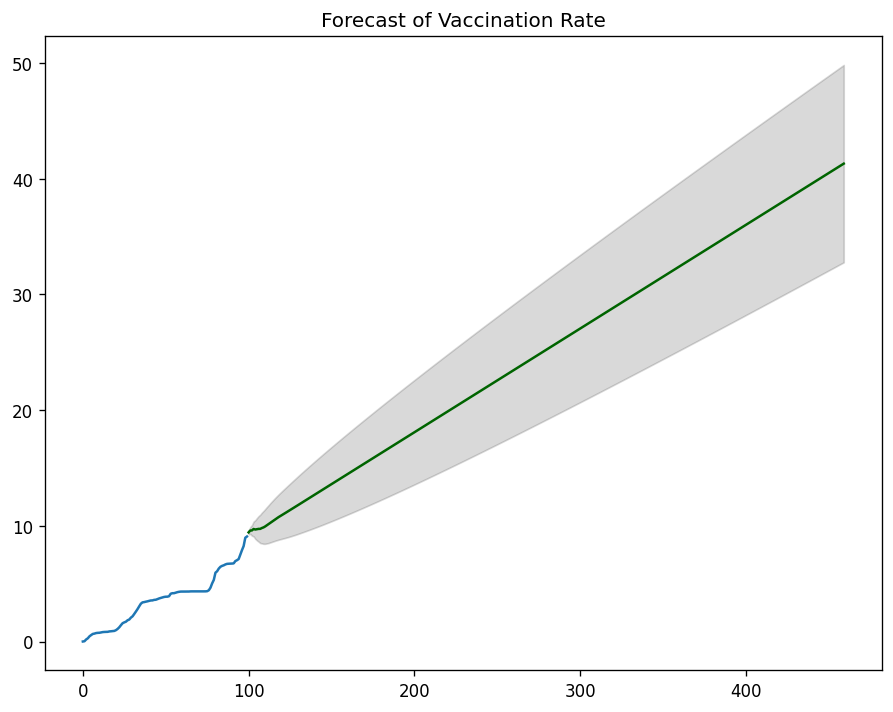

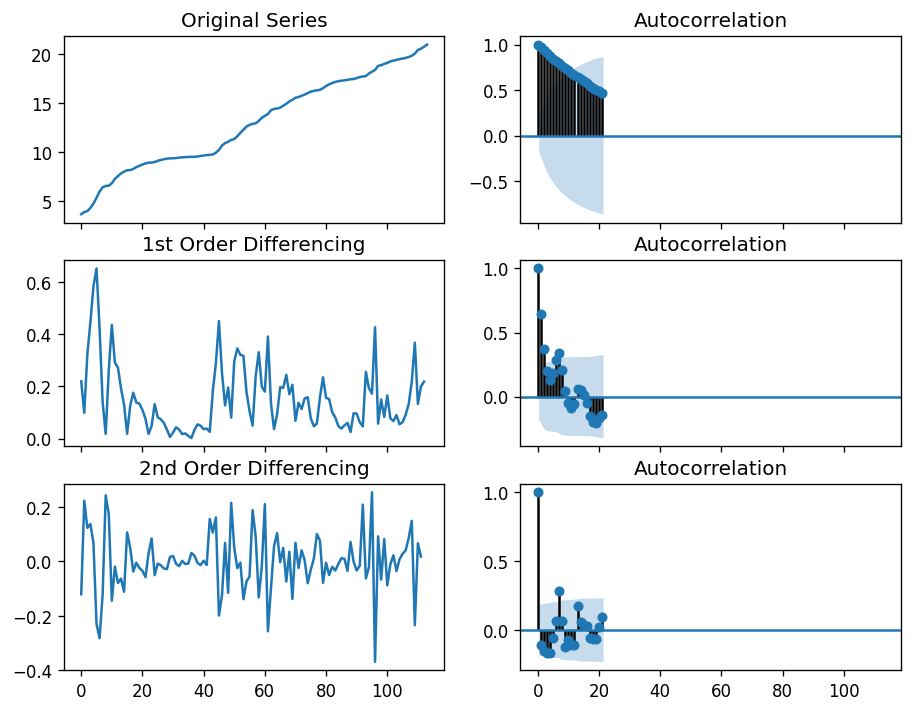

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-178.906, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-178.242, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-179.127, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-180.906, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.508 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  114
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  91.453
Date:                Tue, 08 Jun 2021   AIC                           -180.906
Time:                        04:41:35   BIC                           -178.187
Sample:                             0   HQIC                          -179.803
                                - 114                                         
Co

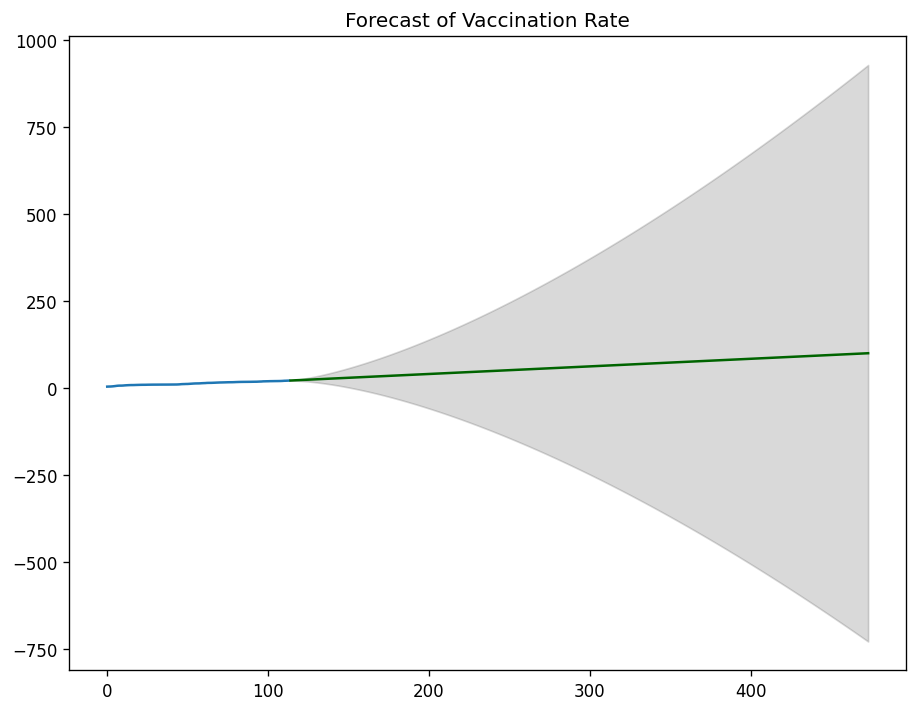

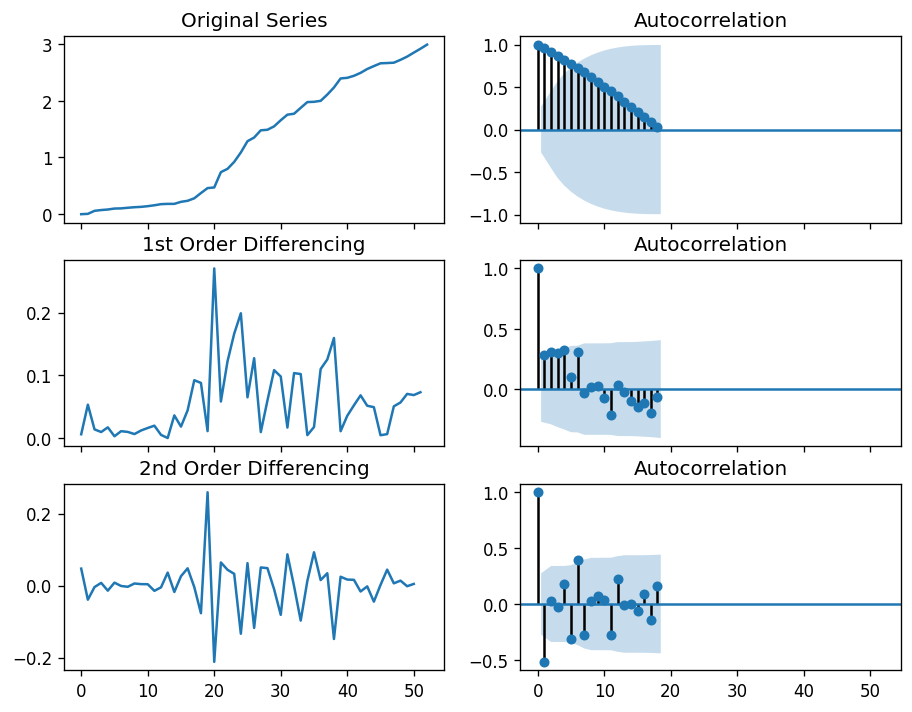

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-146.417, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-125.394, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-139.191, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-148.046, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-127.375, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-146.489, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-144.333, Time=0.16 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-149.861, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-148.263, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-148.345, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-141.158, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-146.169, Time=0.12 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.918 seconds
                               SARIMAX Results                                
Dep. Vari

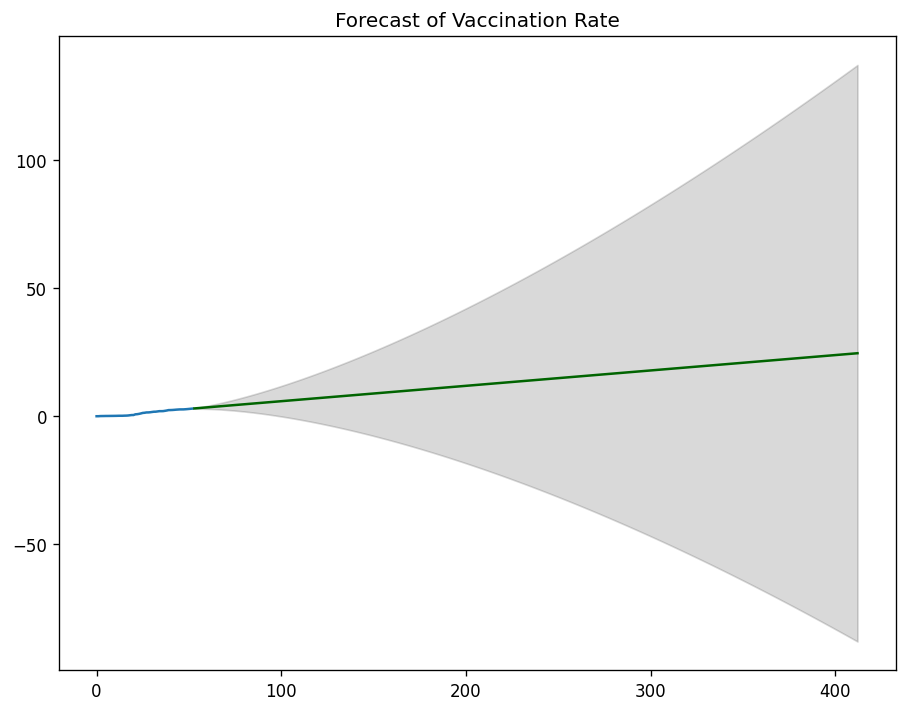

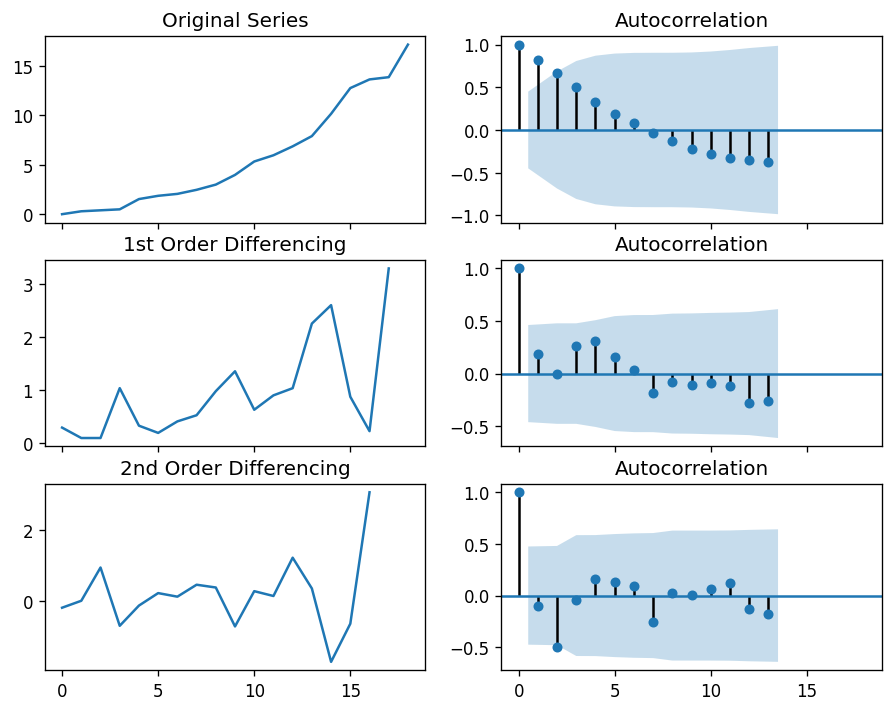

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=51.533, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=53.166, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=50.075, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.327 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 -24.038
Date:                Tue, 08 Jun 2021   AIC                             50.075
Time:                        04:41:39   BIC                             50.908
Sample:                             0   HQIC                            50.158
                                 - 19                                         
Covariance Ty

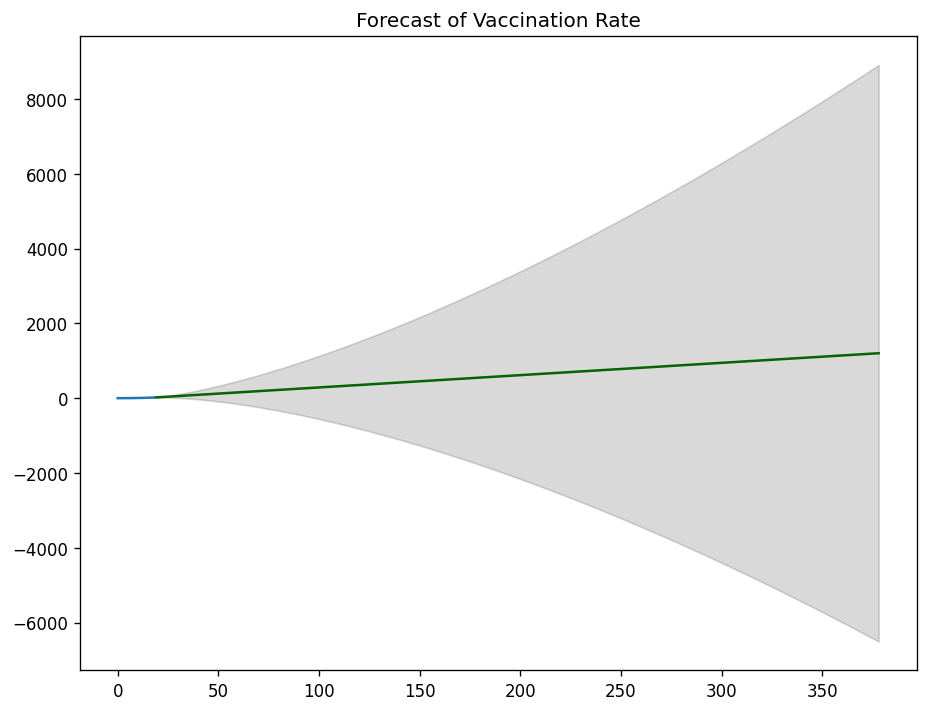

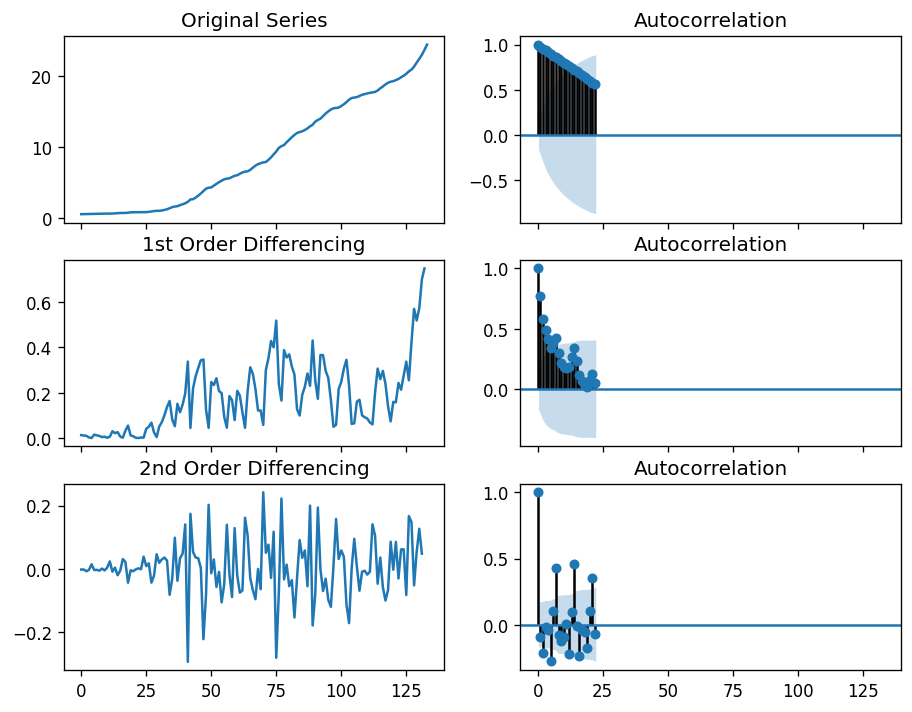

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-266.857, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-260.067, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-259.240, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-260.243, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-261.552, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-267.353, Time=0.25 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-264.272, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-265.385, Time=0.35 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-267.501, Time=0.15 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-268.420, Time=0.15 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-267.549, Time=0.15 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-265.519, Time=0.24 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-268.799, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : 

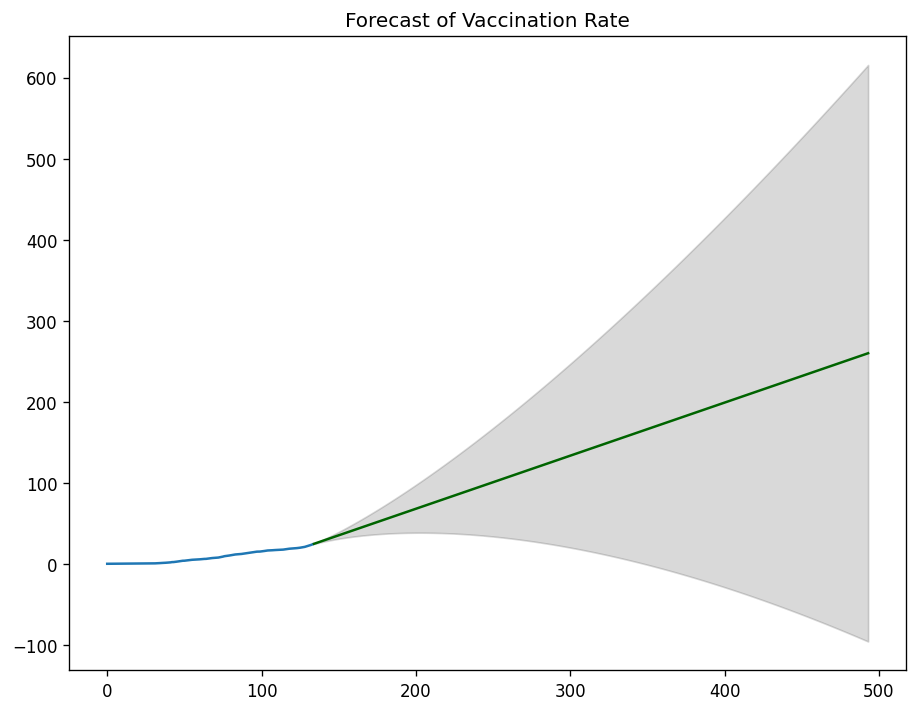

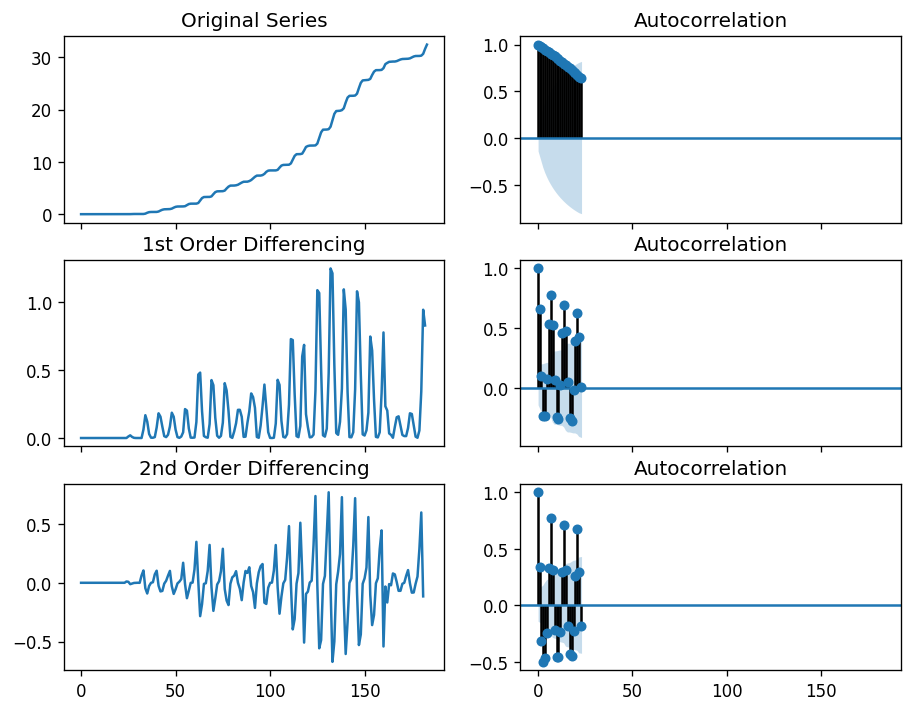

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-77.500, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-31.698, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-52.204, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-78.430, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-33.620, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-115.431, Time=0.22 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-116.135, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-80.409, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-131.565, Time=0.20 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-79.474, Time=0.06 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-202.385, Time=0.25 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-178.052, Tim

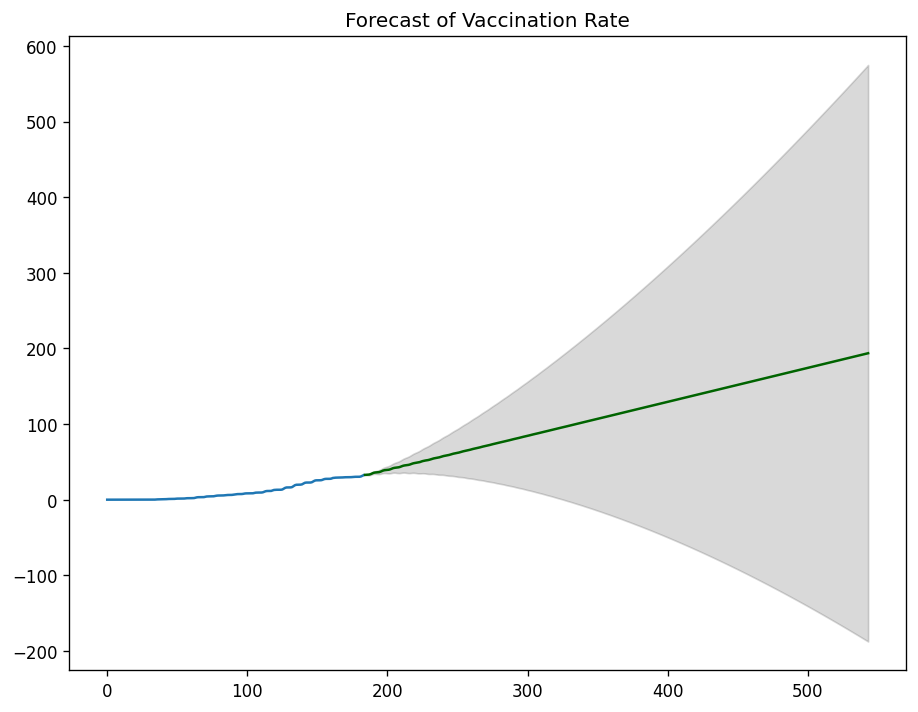

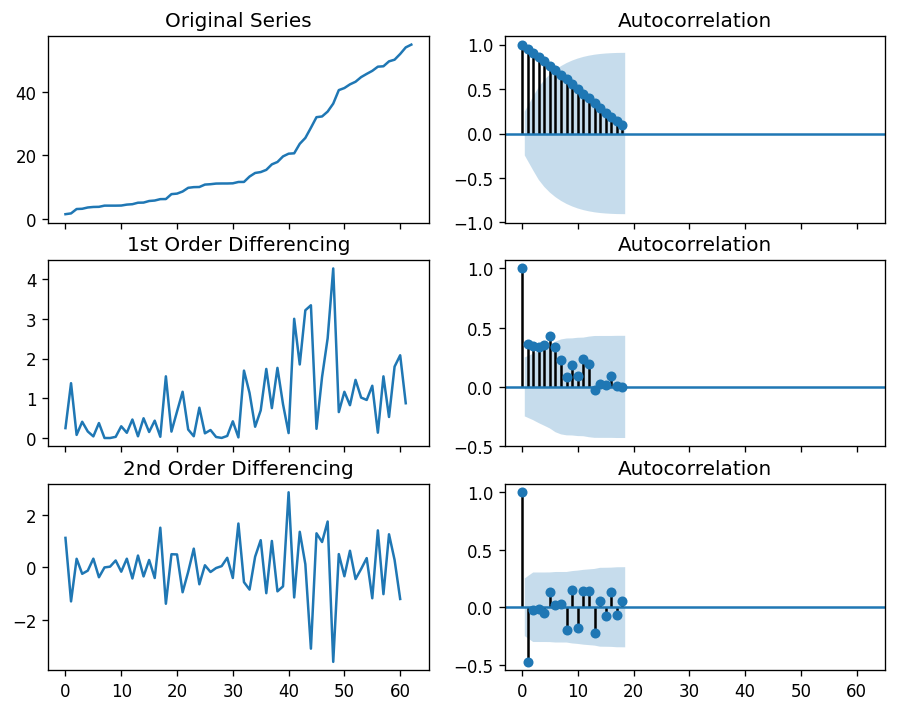

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=157.691, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=184.138, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=170.079, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=155.740, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=182.143, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=157.679, Time=0.16 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=159.340, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=154.180, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=156.078, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=156.049, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=168.097, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=157.506, Time=0.08 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.691 seconds
                               SARIMAX Results                                
Dep. Variable:       

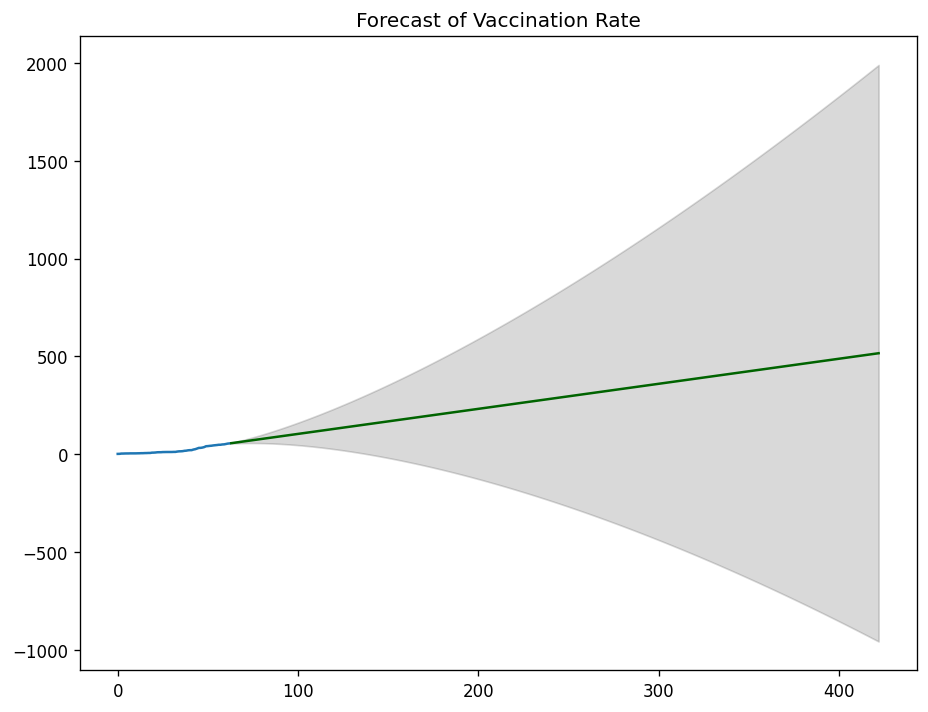

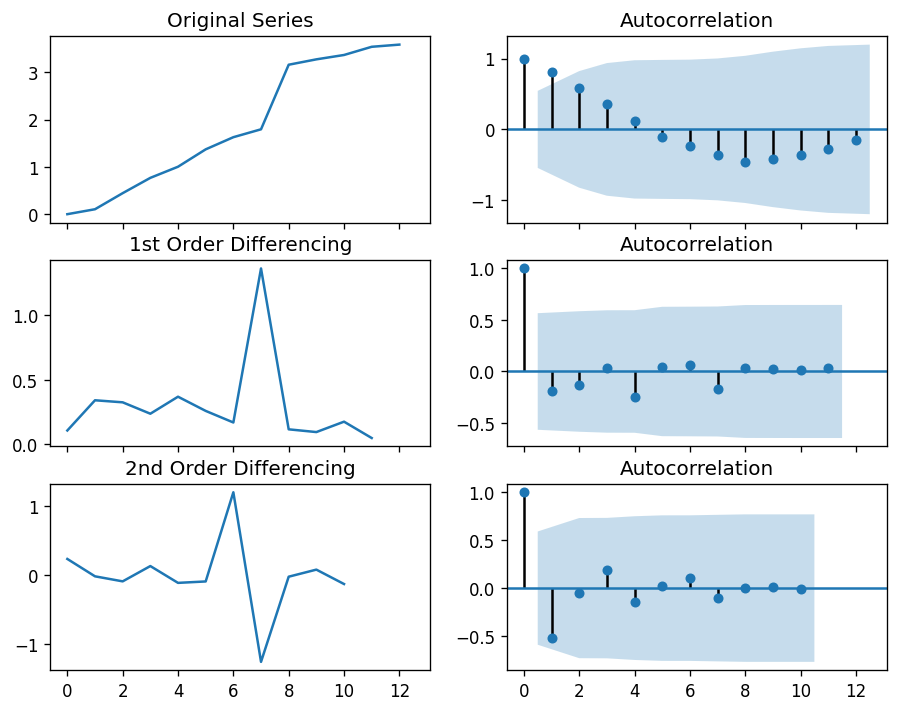

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=21.369, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=20.165, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=19.370, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.327 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   13
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  -8.685
Date:                Tue, 08 Jun 2021   AIC                             19.370
Time:                        04:41:56   BIC                             19.768
Sample:                             0   HQIC                            19.119
                                 - 13                                         
Covariance Ty

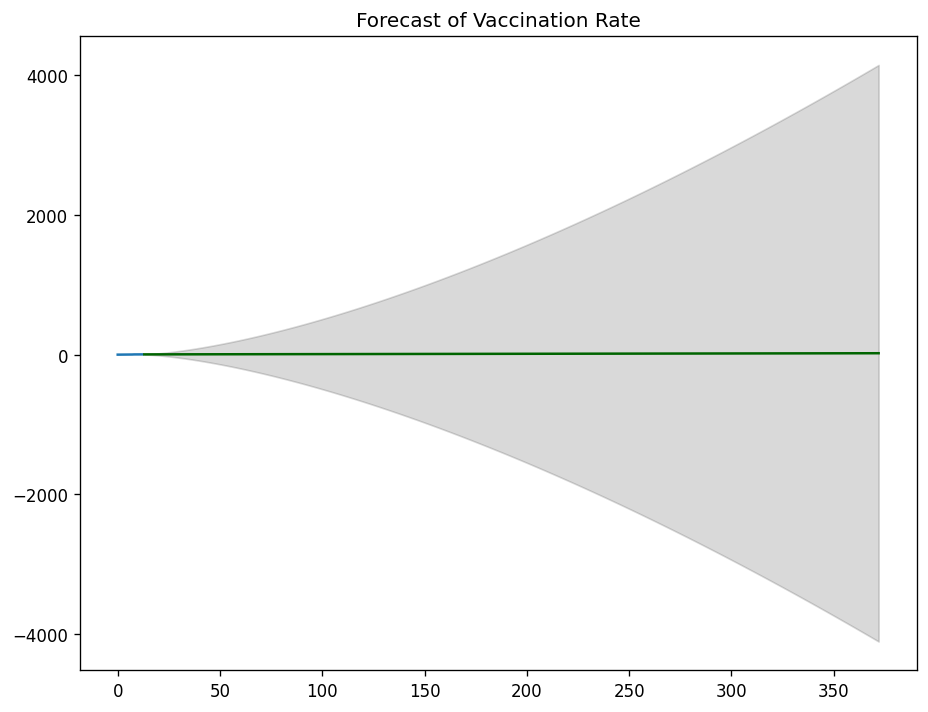

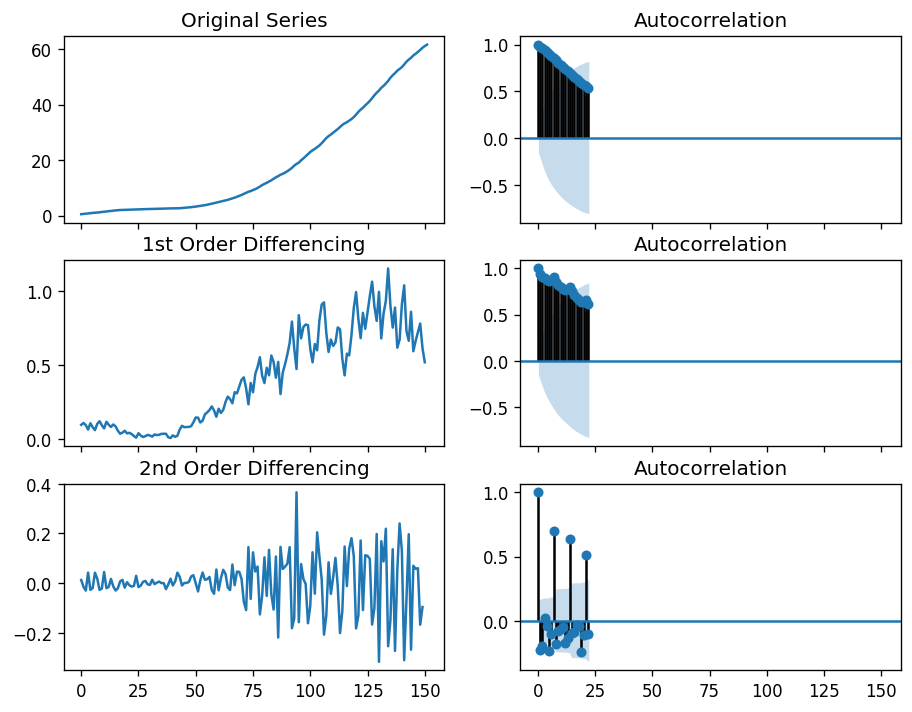

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-264.650, Time=0.27 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-239.341, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-245.189, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-256.091, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-241.237, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-264.927, Time=0.24 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-254.281, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-262.995, Time=0.35 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-268.516, Time=0.44 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-264.847, Time=0.31 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-264.844, Time=0.47 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-283.042, Time=0.47 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-268.219, Time=0.46 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-291.310, Time=0.53 sec
 ARIMA(4,2,3)(0,0,0)[0] intercept

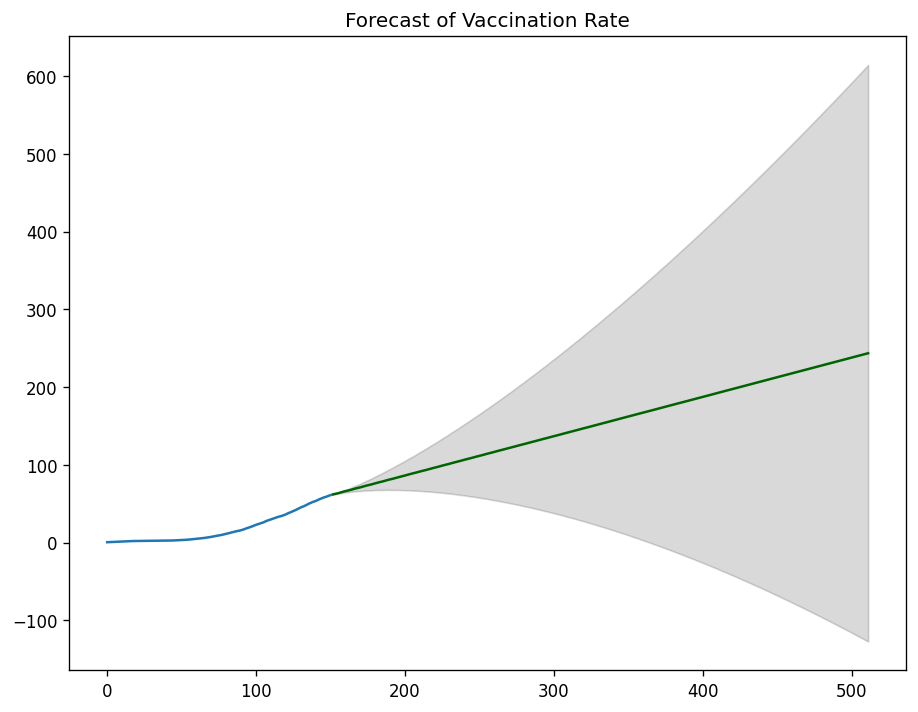

In [7]:
import math
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
country_list = ['PYF', 'AUS', 'EGY', 'USA', 'BRA', 'DEU', 'DNK', 'ZAF', 'RUS', 'GTM',
                'NGA', 'ESP', 'IRN', 'ETH', 'IDN', 'GBR', 'MEX', 'COL', 'CHE', 'LKA', 'TUR', 'NAM',
                'JOR', 'ARG', 'NOR', 'ISL', 'UZB', 'CAN']


#create one big dataframe within the for loop
big_data= pd.DataFrame()       
                       
for country in country_list:
  pcv = pcv.sort_values('location')
  pcv['eid'] = (pcv.groupby(['location']).cumcount()==0).astype(int)
  pcv['eid'] = pcv['eid'].cumsum()
  pcvdf=pcv[pcv.iso_code==country]

  #check dataframe of country
  fpcvdf = pcvdf.sort_values('people_vaccinated')
  pcvval = fpcvdf['people_vaccinated'].values * 100 /list(pcvdf.population)[0]

  for i in range(len(pcvval)):
    if pcvval[i]>=0:
      pass
    else :
      end = i
      break

  pcvval = pcvval[:end]
  d = list(fpcvdf.date)[:end]
  fig, axes = plt.subplots(3, 2, sharex=True)
  axes[0, 0].plot(pcvval); axes[0, 0].set_title('Original Series')
  plot_acf(pcvval, ax=axes[0, 1])

  # 1st Differencing
  axes[1, 0].plot(np.diff(pcvval)); axes[1, 0].set_title('1st Order Differencing')
  plot_acf(np.diff(pcvval), ax=axes[1, 1])
  dpcvval = np.diff(pcvval)

  # 2nd Differencing
  axes[2, 0].plot(np.diff(dpcvval)); axes[2, 0].set_title('2nd Order Differencing')
  plot_acf(np.diff(dpcvval), ax=axes[2, 1])
  plt.show()

  #arima model parameters
  model = pm.auto_arima(pcvval, start_p=1, start_q=1,
  test='adf', # use adftest to find optimal 'd'
  max_p=4, max_q=4, # maximum p and q
  m=1, # frequency of series
  d=None, # let model determine 'd'
  seasonal=False, # No Seasonality
  start_P=0,
  D=0,
  trace=True,
  error_action='ignore',
  suppress_warnings=True,
  stepwise=True)
  print(model.summary())
  # model.plot_diagnostics(figsize=(7,5))
  plt.show()
  n_periods = 12*30
  fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
  index_of_fc = np.arange(len(pcvval), len(pcvval)+n_periods)

  # make series for plotting purpose
  fc_series = pd.Series(fc, index=index_of_fc)
  lower_series = pd.Series(confint[:, 0], index=index_of_fc)
  upper_series = pd.Series(confint[:, 1], index=index_of_fc)
  # Plot
  plt.plot(pcvval)
  plt.plot(fc_series, color='darkgreen')
  plt.fill_between(lower_series.index,
  lower_series,
  upper_series,
  color='k', alpha=.15)
  plt.title("Forecast of Vaccination Rate")
  plt.show()

  

# Adding Lag to stabilize different gaps between two doses

## Creating master data set : world_data_forecast.csv

In [17]:
for i in range(n_periods):
    date = parse(d[-1]) + datetime.timedelta(days=1)
    d.append(str(date).split()[0])

     #calculates the lag
    vaccinated = (fpcvdf.dropna(subset=["people_vaccinated"])["people_vaccinated"]*100/list(pcvdf.population)[0]).tolist()
    fully_vaccinated = (fpcvdf.dropna(subset=["people_vaccinated"])["people_fully_vaccinated"]*100/list(pcvdf.population)[0]).tolist()
    mseMin = math.inf
    lagMin=0


    for lag in range(0,139):
      vacNew = vaccinated[:len(vaccinated)-lag]
      fullVacNew = fully_vaccinated[lag:]
      mse = 0
      if len(fullVacNew)> 0:
        for i in range(len(fullVacNew)):
          mse += (vacNew[i] - fullVacNew[i])**2
          mse = mse/len(vacNew)
          if mse < mseMin:
            lagMin = lag
            mseMin = mse
        else:
          pass
 
    y = list(pcvval) + list(fc)

dfp = pd.DataFrame()
dfp['date'] = d
dfp["date"] = pd.to_datetime(dfp["date"]) #convert string into datetime object
dfp["date_adjusted"] =  dfp["date"] + datetime.timedelta(days=lagMin) #add lag factor
dfp['people_fully_vaccinated'] = y
dfp['location']= country
big_data= pd.concat([big_data, dfp], axis=0, sort=False, ignore_index=True)

big_data.to_csv(f'world_data_forecast.csv', index= False)
